# Load and understand Data

Text(0, 0.5, 'Number of Publications')

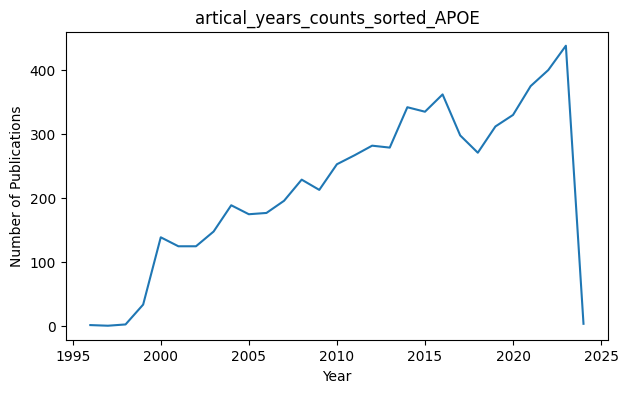

In [26]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

article = pd.read_csv("articles.APOE.csv")
artical_years_counts = article['Year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(7, 4))
artical_years_counts.plot()
plt.title('artical_years_counts_sorted_APOE')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

<Figure size 700x400 with 0 Axes>

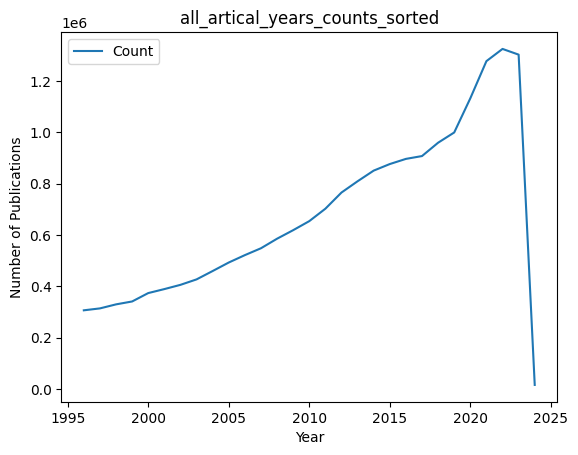

In [27]:
paper_count = pd.read_csv('paper_counts.csv')
paper_count = paper_count[paper_count['Year'] >= 1996]

# Create a line plot
plt.figure(figsize=(7, 4))
paper_count.plot(x = 'Year', y = 'Count')
plt.title('all_artical_years_counts_sorted')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

# Show the plot
plt.show()

# Three ways to find active researchers

## 1st method: counting the number of articles published as first authors only

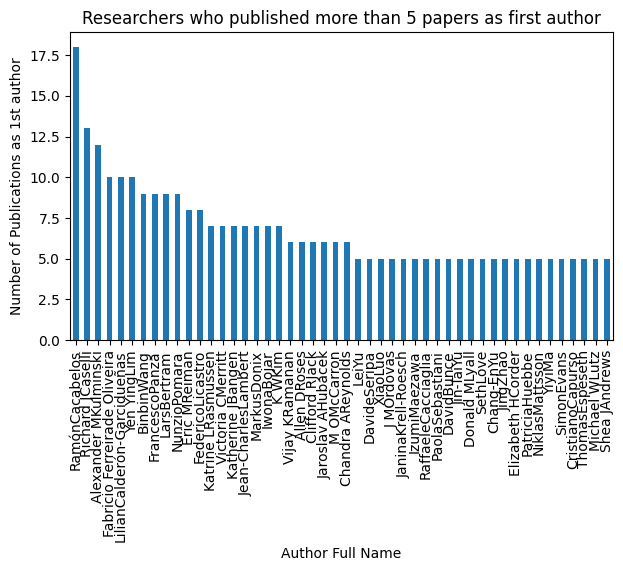

RamónCacabelos                  18
Richard JCaselli                13
Alexander MKulminski            12
Fabricio Ferreirade Oliveira    10
LilianCalderón-Garcidueñas      10
Yen YingLim                     10
BinbinWang                       9
FrancescoPanza                   9
LarsBertram                      9
NunzioPomara                     9
Eric MReiman                     8
FedericoLicastro                 8
Katrine LRasmussen               7
Victoria CMerritt                7
Katherine JBangen                7
Jean-CharlesLambert              7
MarkusDonix                      7
IwonaBojar                       7
K WKim                           7
Vijay KRamanan                   6
Allen DRoses                     6
Clifford RJack                   6
Jaroslav AHubacek                6
M OMcCarron                      6
Chandra AReynolds                6
LeiYu                            5
DavideSeripa                     5
XiaoLuo                          5
J MOrdovas          

In [28]:
# Create a new column contains the full name
article["fullname"] = article["FirstAuthorForename"] + article["FirstAuthorLastname"]

# Group by 'fullname' and count the number of publications for each author
author_publication_counts_1st = article['fullname'].value_counts()

# Select the top 10 authors with the most publications
top_48_authors = author_publication_counts_1st.head(48)

# Create a bar plot
plt.figure(figsize=(7, 4))
top_48_authors.plot(kind='bar')
plt.title('Researchers who published more than 5 papers as first author')
plt.xlabel('Author Full Name')
plt.ylabel('Number of Publications as 1st author')
# Show the plot
plt.show()

top_48_authors

## 2nd method: counting the number of articles published as co-authors

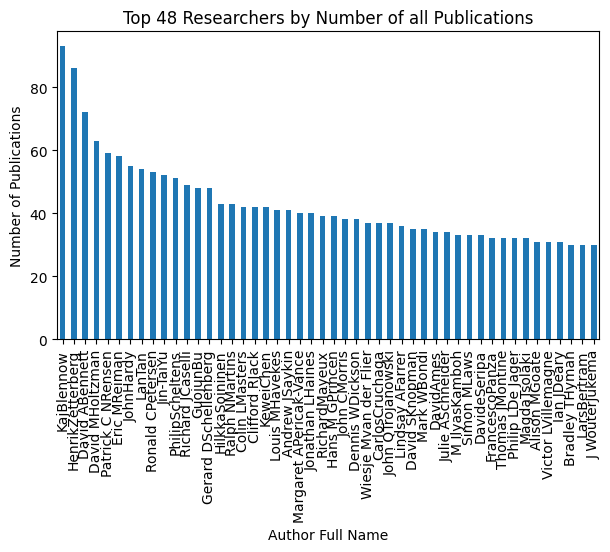

KajBlennow                 93
HenrikZetterberg           86
David ABennett             72
David MHoltzman            63
Patrick C NRensen          59
Eric MReiman               58
JohnHardy                  55
LanTan                     54
Ronald CPetersen           53
Jin-TaiYu                  52
PhilipScheltens            51
Richard JCaselli           49
GuojunBu                   48
Gerard DSchellenberg       48
HilkkaSoininen             43
Ralph NMartins             43
Colin LMasters             42
Clifford RJack             42
KeweiChen                  42
Louis MHavekes             41
Andrew JSaykin             41
Margaret APericak-Vance    40
Jonathan LHaines           40
RichardMayeux              39
Hans M GPrincen            39
John CMorris               38
Dennis WDickson            38
Wiesje Mvan der Flier      37
CarlosCruchaga             37
John QTrojanowski          37
Lindsay AFarrer            36
David SKnopman             35
Mark WBondi                35
DavidAmes 

In [29]:
authors = pd.read_csv('authors.APOE.csv')
authors["fullname"] = authors["AuthorForename"] + authors["AuthorLastname"]

# Group by 'fullname' and count the number of publications for each author
author_publication_counts_all = authors['fullname'].value_counts()

# Select the top 10 authors with the most publications
top_48_authors_all = author_publication_counts_all.head(48)

# Create a bar plot
plt.figure(figsize=(7,4))
top_48_authors_all.plot(kind='bar')
plt.title('Top 48 Researchers by Number of all Publications')
plt.xlabel('Author Full Name')
plt.ylabel('Number of Publications')


# Show the plot
plt.show()
top_48_authors_all

## 3rd method: combining the number of articles published as first author and co-author

In [30]:
authors_1st_index = top_48_authors.reset_index()
authors_all_index = top_48_authors_all.reset_index()

first_series = pd.Series(authors_1st_index["index"].values)
all_series = pd.Series(authors_all_index["index"].values)

df = pd.concat([first_series,all_series],axis=1)

df.columns = ['1st', 'all']
df["isin"] = df["1st"].isin(df["all"])
df


1st                      all   isin
0                 RamónCacabelos               KajBlennow  False
1               Richard JCaselli         HenrikZetterberg   True
2           Alexander MKulminski           David ABennett  False
3   Fabricio Ferreirade Oliveira          David MHoltzman  False
4     LilianCalderón-Garcidueñas        Patrick C NRensen  False
5                    Yen YingLim             Eric MReiman  False
6                     BinbinWang                JohnHardy  False
7                 FrancescoPanza                   LanTan   True
8                    LarsBertram         Ronald CPetersen   True
9                   NunzioPomara                Jin-TaiYu  False
10                  Eric MReiman          PhilipScheltens   True
11              FedericoLicastro         Richard JCaselli  False
12            Katrine LRasmussen                 GuojunBu  False
13             Victoria CMerritt     Gerard DSchellenberg  False
14             Katherine JBangen           HilkkaSoininen  False
15           Jean-CharlesLambert           Ralph NMartins  False
16                   MarkusDonix           Colin LMasters  False
17                    IwonaBojar           Clifford RJack  False
18                        K WKim                KeweiChen  False
19                Vijay KRamanan           Louis MHavekes  False
20                  Allen DRoses           Andrew JSaykin  False
21                Clifford RJack  Margaret APericak-Vance   True
22             Jaroslav AHubacek         Jonathan LHaines  False
23                   M OMcCarron            RichardMayeux  False
24             Chandra AReynolds          Hans M GPrincen  False
25                         LeiYu             John CMorris  False
26                  DavideSeripa          Dennis WDickson   True
27                       XiaoLuo    Wiesje Mvan der Flier  False
28                    J MOrdovas           CarlosCruchaga  False
29            JaninaKrell-Roesch        John QTrojanowski  False
30                  IzumiMaezawa          Lindsay AFarrer  False
31            RaffaeleCacciaglia           David SKnopman  False
32               PaolaSebastiani              Mark WBondi  False
33                    DavidBunce                DavidAmes  False
34                     Jin-TaiYu         Julie ASchneider   True
35                 Donald MLyall            M IlyasKamboh  False
36                      SethLove              Simon MLaws  False
37                    Chang-EnYu             DavideSeripa  False
38                      JingZhao           FrancescoPanza  False
39             Elizabeth HCorder          Thomas JMontine  False
40                PatriciaHuebbe         Philip LDe Jager  False
41                NiklasMattsson             MagdaTsolaki  False
42                        YiyiMa            Alison MGoate  False
43                    SimonEvans       Victor LVillemagne  False
44              CristianoCapurso               Ian JDeary  False
45                ThomasEspeseth           Bradley THyman  False
46                 Michael WLutz              LarsBertram  False
47                 Shea JAndrews           J WouterJukema  False

In [31]:
# Filter out rows whose isin column is True
isin_true = df[df['isin']]
print(isin_true["1st"])


1     Richard JCaselli
7       FrancescoPanza
8          LarsBertram
10        Eric MReiman
21      Clifford RJack
26        DavideSeripa
34           Jin-TaiYu
Name: 1st, dtype: object


In [32]:
# Convert Series to DataFrame
df_top_48_authors = top_48_authors.reset_index()
df_top_48_authors.columns = ['fullname', 'count_as_first_author']

df_top_48_authors_all = top_48_authors_all.reset_index()
df_top_48_authors_all.columns = ['fullname', 'count_as_co_author']

# merge DataFrame
merged_df = pd.merge(df_top_48_authors, df_top_48_authors_all, on='fullname', how='outer')

# Filter rows with both 'count_as_first_author' and 'count_as_co_author' non-null values
non_empty_rows = merged_df[merged_df['count_as_first_author'].notna() & merged_df['count_as_co_author'].notna()]

non_empty_rows

fullname  count_as_first_author  count_as_co_author
1   Richard JCaselli                   13.0                49.0
7     FrancescoPanza                    9.0                32.0
8        LarsBertram                    9.0                30.0
10      Eric MReiman                    8.0                58.0
21    Clifford RJack                    6.0                42.0
26      DavideSeripa                    5.0                33.0
34         Jin-TaiYu                    5.0                52.0

In [33]:
#Merging the forename and last name to create a full name for the authors
authors["AuthorFullname"] = authors["AuthorForename"] + " " + authors["AuthorLastname"]
#Importing numpy and matplotlib modules
import numpy as np
import matplotlib.pyplot as plt
#Creating a dataframe with PMID and full name columns only
network_analysis = authors[["PMID", "AuthorFullname"]]

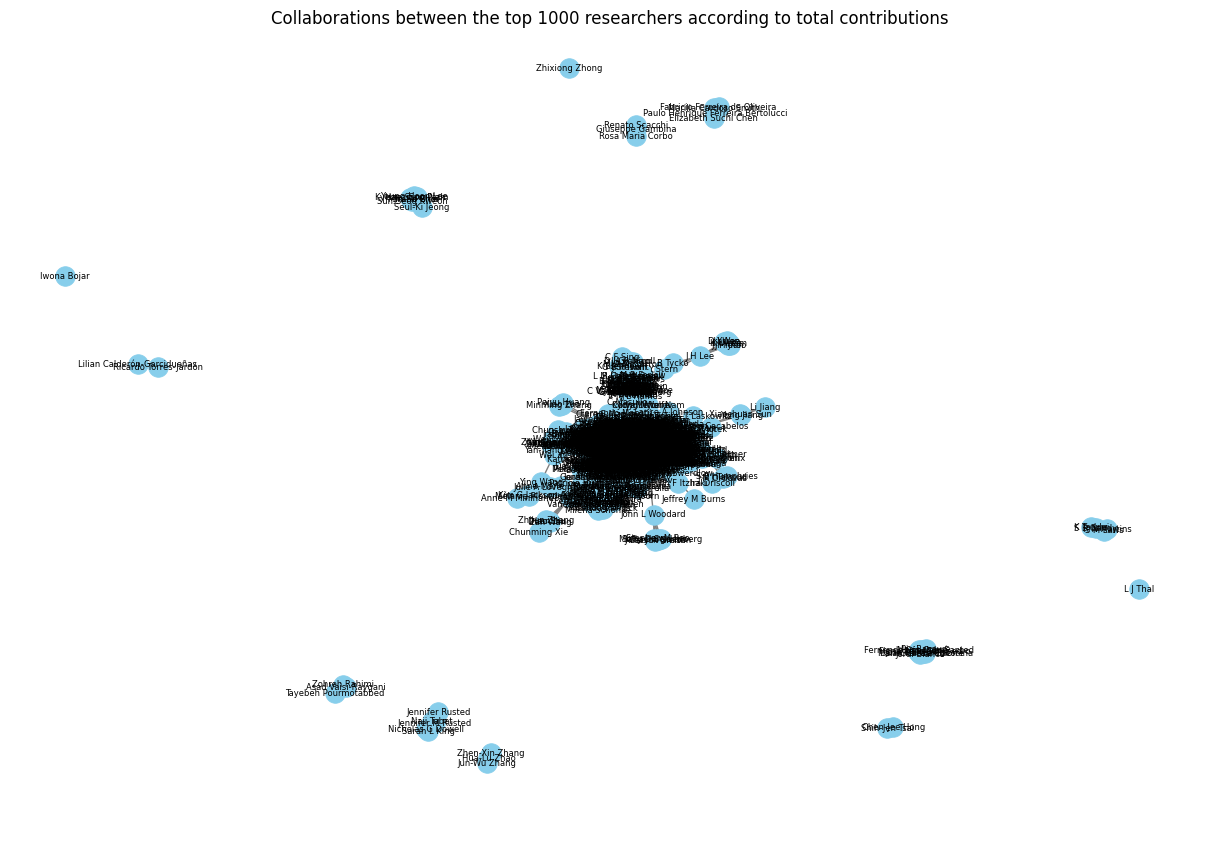

In [34]:
#Performing network analysis on the top 1000 researchers according to number of collaborations
#Just to show that there are clusters and competition when we look on a large scale
#We only looked at 1000 to reduce computational time
#Importing the networkx module
import networkx as nx
#Calculating the top 1000 authors according to occurrence in the dataset
top_authors = network_analysis["AuthorFullname"].value_counts().nlargest(1000).index
#Creating a dataframe with only the top 1000 authors in it for the network analysis
df_top1000 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors)]
#Creating space for the graph
G = nx.Graph()
#Looping over the PMIDs
for pmid, group in df_top1000.groupby('PMID'):
    #Setting authors variable as the authors full name in the dataframe
    authors = group['AuthorFullname'].tolist()
    #Looping over each author
    for author1 in authors:
        #Considering relationship between 2 authors
        for author2 in authors:
            #Creating nodes depending on the relationships between the authors
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)
#Setting the layout of the network analysis
pos = nx.spring_layout(G)
#Creating a figure
fig = plt.figure(figsize=(12, 8))
#Performing the network analysis
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
#Setting a title for the plot
plt.title('Collaborations between the top 1000 researchers according to total contributions')
#Displaying the plot
plt.show()

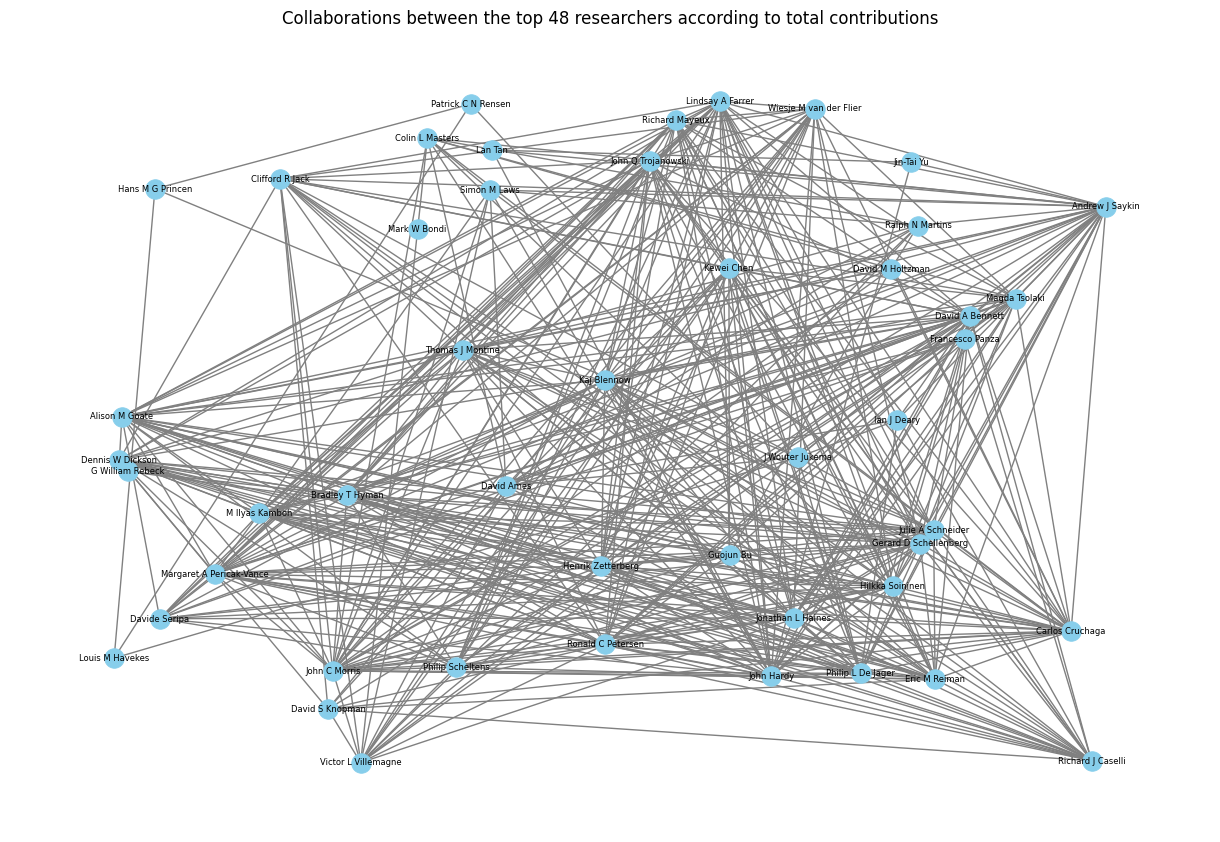

In [35]:
#Calculating the top 48 authors according to occurrence in the dataset
top_authors_48 = network_analysis["AuthorFullname"].value_counts().nlargest(48).index
#Creating a dataframe with only the top 48 authors in it for the network analysis
df_top48 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors_48)]
#Creating space for the graph
G = nx.Graph()
#Looping over the PMIDs
for pmid, group in df_top48.groupby('PMID'):
    #Setting authors variable as the authors full name in the dataframe
    authors = group['AuthorFullname'].tolist()
    #Looping over each author
    for author1 in authors:
        #Considering relationship between 2 authors
        for author2 in authors:
            #Creating nodes depending on the relationships between the authors
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)
#Setting the layout of the network analysis
pos = nx.random_layout(G)
#Creating a figure
fig = plt.figure(figsize=(12, 8))
#Performing the network analysis
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
#Setting a title for the plot
plt.title('Collaborations between the top 48 researchers according to total contributions')
#Displaying the plot
plt.show()

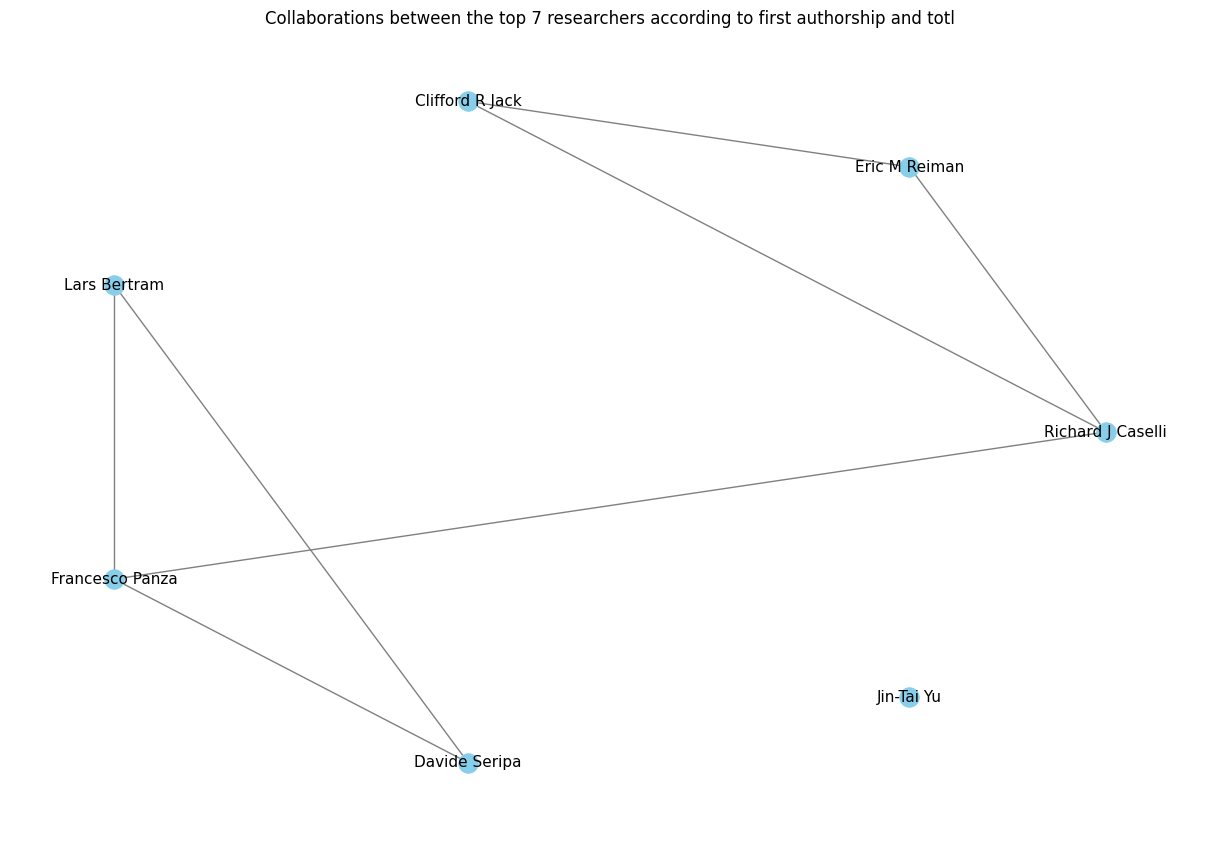

In [36]:
#Creating space for the graph
G = nx.Graph()
#Listing the top researchers that were in the top 48 for both first authorship and total contribution (7 authors)
top_researchers = ["Richard J Caselli", "Francesco Panza", "Lars Bertram", "Eric M Reiman", "Clifford R Jack", "Davide Seripa", "Jin-Tai Yu"]
#Creating a dataframe with only the top 7 authors in it for the network analysis
top_researchers_ = network_analysis[network_analysis["AuthorFullname"].isin(top_researchers)]
#Looping over the PMIDs
for pmid, group in top_researchers_.groupby('PMID'):
    #Setting authors variable as the authors full name in the dataframe
    authors = group['AuthorFullname'].tolist()
    #Looping over each author
    for author1 in authors:
        #Considering relationship between 2 authors
        for author2 in authors:
            #Creating nodes depending on the relationships between the authors
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)
#Setting the layout of the network analysis
pos = nx.circular_layout(G)
#Creating a figure
fig = plt.figure(figsize=(12, 8))
#Performing network analysis
nx.draw(G, pos, with_labels=True, font_size=11, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
#Setting a title for the plot
plt.title('Collaborations between the top 7 researchers according to first authorship and totl')
#Displaying the plot
plt.show()

## Identifying persons active in recent years

In [37]:
# It may be necessary to increase the number of personnel bases for the two basic methods to broaden the scope of screening



## Mapping relationships

In [38]:
# Based on the identified active researchers, a knowledge graph is drawn, 
# in which the researchers with connections are the active and collaborative researchers we are looking for.



In [230]:
import pandas as pd

# 读取数据文件
df = pd.read_csv('authors.APOE.csv')

# 填充缺失值
df["AuthorForename"] = df["AuthorForename"].fillna('')
df["AuthorLastname"] = df["AuthorLastname"].fillna('')

# 合并姓和名
df["FullName"] = df["AuthorForename"] + df["AuthorLastname"]

# 删选出第一作者和最后一名作者的数据
first_authors = df[df['AuthorN'] == 1]
last_authors = df[df['AuthorN'] == df.groupby('PMID')['AuthorN'].transform('max')]

# 统计每位作者作为第一作者和最后一名作者发表的文章数量
first_author_counts = first_authors.groupby('FullName').size()
last_author_counts = last_authors.groupby('FullName').size()

# 通过 reset_index() 重置索引，以确保长度一致
total_counts = pd.concat([first_author_counts, last_author_counts], axis=1, keys=['FirstAuthorCounts', 'LastAuthorCounts']).fillna(0).reset_index()

# 计算第四列的值
total_counts['TotalCounts'] = total_counts['FirstAuthorCounts'] + total_counts['LastAuthorCounts']

# 创建包含结果的新 DataFrame
result_df = pd.DataFrame({
    'FullName': total_counts['FullName'],
    'FirstAuthorCounts': total_counts['FirstAuthorCounts'],
    'LastAuthorCounts': total_counts['LastAuthorCounts'],
    'TotalCounts': total_counts['TotalCounts']
})

# 按照 'TotalCounts' 列从大到小排序
result_df_sorted = result_df.sort_values(by='TotalCounts', ascending=False)

# 打印排序后的结果
print(result_df_sorted.head(30))

                  FullName  FirstAuthorCounts  LastAuthorCounts  TotalCounts
1001       David MHoltzman                2.0              32.0         34.0
6835                LanTan                0.0              33.0         33.0
3760        RamónCacabelos               18.0              14.0         32.0
1563              GuojunBu                1.0              23.0         24.0
1262          Eric MReiman                8.0              16.0         24.0
3814      Richard JCaselli               13.0              10.0         23.0
2813         M IlyasKamboh                3.0              19.0         22.0
1436       G WilliamRebeck                2.0              19.0         21.0
2109             Jin-TaiYu                5.0              15.0         20.0
3008           Mark WBondi                3.0              16.0         19.0
6498           JianpingJia                0.0              19.0         19.0
1393        FrancescoPanza                9.0              10.0         19.0

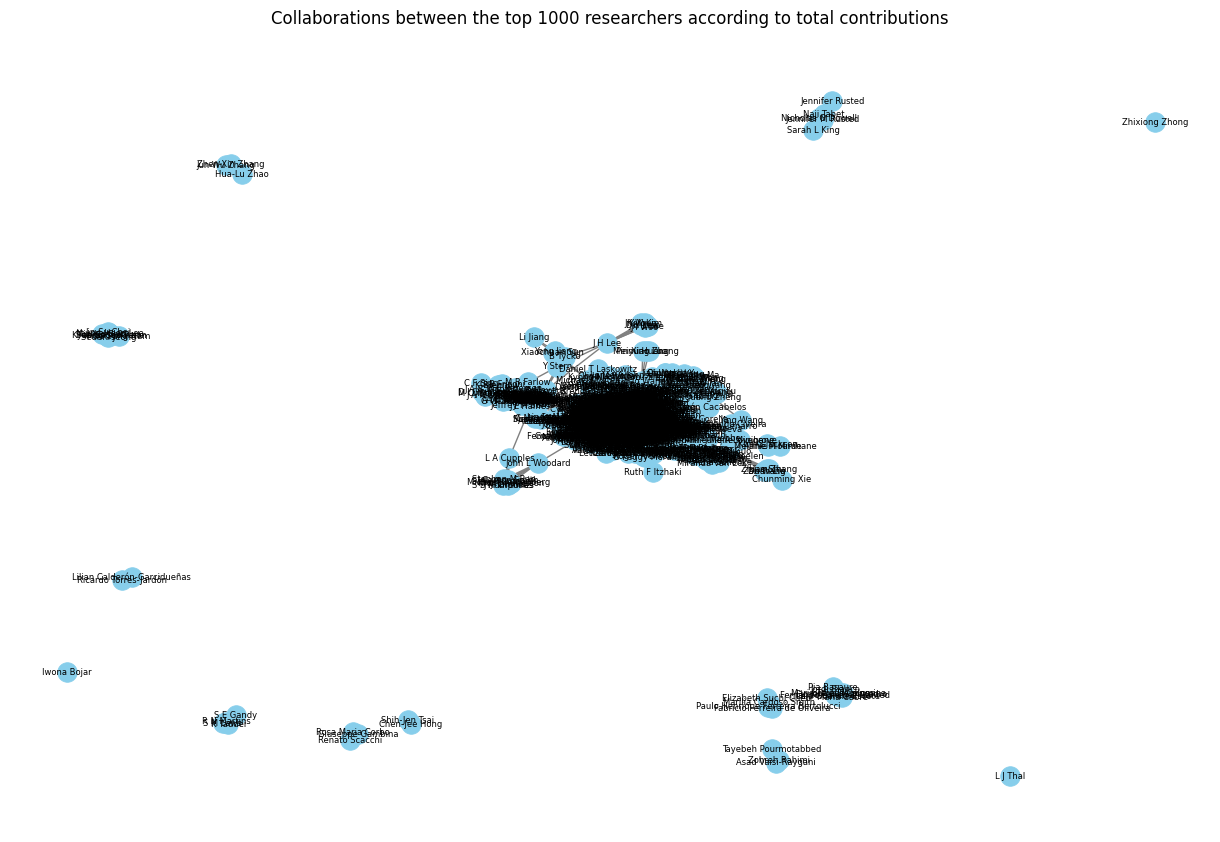

In [60]:
#Performing network analysis on the top 1000 researchers according to number of collaborations
#Just to show that there are clusters and competition when we look on a large scale
#We only looked at 1000 to reduce computational time
#Importing the networkx module

import networkx as nx
#Calculating the top 1000 authors according to occurrence in the dataset
top_authors = network_analysis["AuthorFullname"].value_counts().nlargest(1000).index
#Creating a dataframe with only the top 1000 authors in it for the network analysis
df_top1000 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors)]
#Creating space for the graph


G = nx.Graph()
#Looping over the PMIDs
for pmid, group in df_top1000.groupby('PMID'):
    #Setting authors variable as the authors full name in the dataframe
    authors = group['AuthorFullname'].tolist()
    #Looping over each author
    for author1 in authors:
        #Considering relationship between 2 authors
        for author2 in authors:
            #Creating nodes depending on the relationships between the authors
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)
#Setting the layout of the network analysis
pos = nx.spring_layout(G)
#Creating a figure
fig = plt.figure(figsize=(12, 8))
#Performing the network analysis
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
#Setting a title for the plot
plt.title('Collaborations between the top 1000 researchers according to total contributions')
#Displaying the plot
plt.show()

In [104]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 计算前20位作者
top_20_authors = network_analysis["AuthorFullname"].value_counts().nlargest(20).index

# 创建包含前20位作者的数据框
df_top20 = network_analysis[network_analysis["AuthorFullname"].isin(top_20_authors)]

# 创建图
G = nx.Graph()

# 遍历每篇文章
for pmid, group in df_top20.groupby('PMID'):
    # 提取作者列表
    authors = group['AuthorFullname'].tolist()
    
    # 创建节点和边
    for author1 in authors:
        # 将前20位作者设为一个节点
        if author1 not in G.nodes:
            G.add_node(author1)
        for author2 in authors:
            # 与前20位作者有过合作的其他作者也设为节点，并添加边
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)

# 获取边的权重信息
max_weight = max(G[u][v]['weight'] for u, v in G.edges())
edge_weights = [1 + 10 * G[u][v]['weight'] / max_weight for u, v in G.edges()]  # 调整权重范围，使其更宽
max_size = max(df_top20['TotalCounts'])
node_sizes = [50 + 50 * count / max_size for count in df_top20['TotalCounts']]

# 根据作者分组创建 shell_layout
pos = nx.shell_layout(G, nlist=[list(group['AuthorFullname']) for pmid, group in df_top20.groupby('PMID')])

# 创建更大的图形
fig = plt.figure(figsize=(20, 15))

# 绘制网络图，根据边的权重设置线条粗细
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', width=edge_weights)

# 设置图形标题
plt.title('Collaborations between the top 20 authors and their collaborators')

# 显示图形
plt.show()


KeyError: 'TotalCounts'

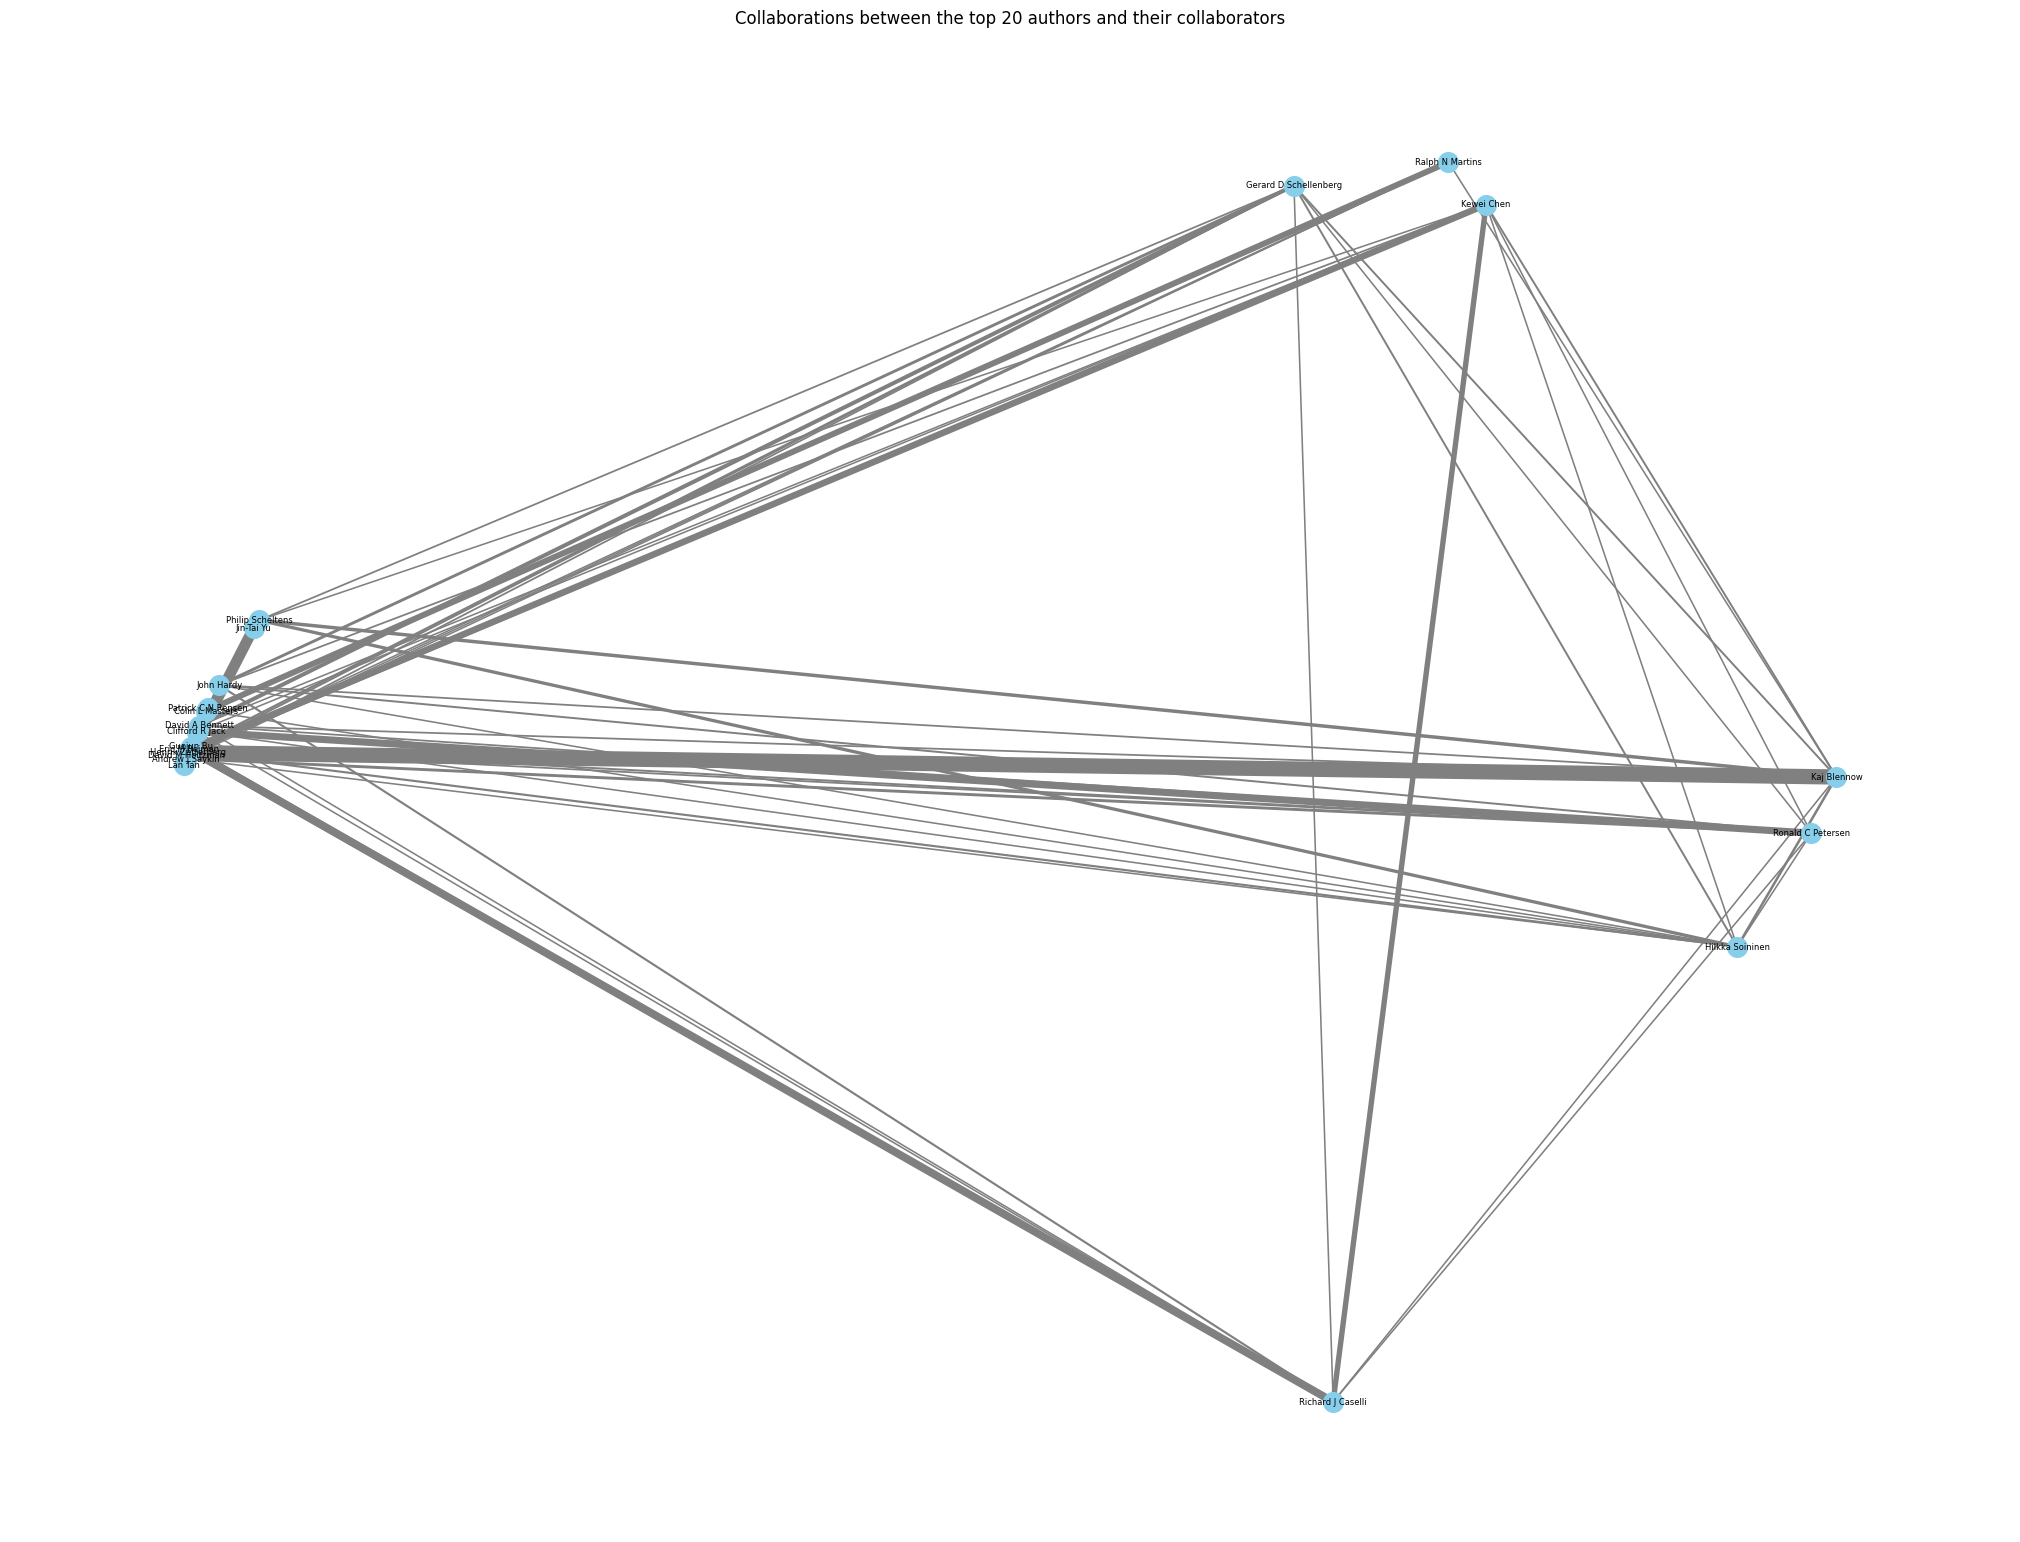

In [105]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 计算前20位作者
top_20_authors = network_analysis["AuthorFullname"].value_counts().nlargest(20).index

# 创建包含前20位作者的数据框
df_top20 = network_analysis[network_analysis["AuthorFullname"].isin(top_20_authors)]

# 创建图
G = nx.Graph()

# 遍历每篇文章
for pmid, group in df_top20.groupby('PMID'):
    # 提取作者列表
    authors = group['AuthorFullname'].tolist()
    
    # 创建节点和边
    for author1 in authors:
        # 将前20位作者设为一个节点
        if author1 not in G.nodes:
            G.add_node(author1)
        for author2 in authors:
            # 与前20位作者有过合作的其他作者也设为节点，并添加边
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)

# 获取边的权重信息
max_weight = max(G[u][v]['weight'] for u, v in G.edges())
edge_weights = [1 + 10 * G[u][v]['weight'] / max_weight for u, v in G.edges()]  # 调整权重范围，使其更宽

# 根据作者分组创建 shell_layout
pos = nx.shell_layout(G, nlist=[list(group['AuthorFullname']) for pmid, group in df_top20.groupby('PMID')])

# 创建更大的图形
fig = plt.figure(figsize=(20, 15))

# 绘制网络图，根据边的权重设置线条粗细
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', width=edge_weights)

# 设置图形标题
plt.title('Collaborations between the top 20 authors and their collaborators')

# 显示图形
plt.show()


In [107]:
network_analysis

PMID       AuthorFullname
0      10545039         K E Morrison
1      10545039             G Steers
2      10545039           V Dubowitz
3      10558867           M L Brandi
4      10558867          L Becherini
...         ...                  ...
56887  38091051         Jasmine King
56888  38091051  Allison Ashley-Koch
56889  38091051          Darin Clark
56890  38091051       Michael W Lutz
56891  38091051      Alexandra Badea

[56892 rows x 2 columns]

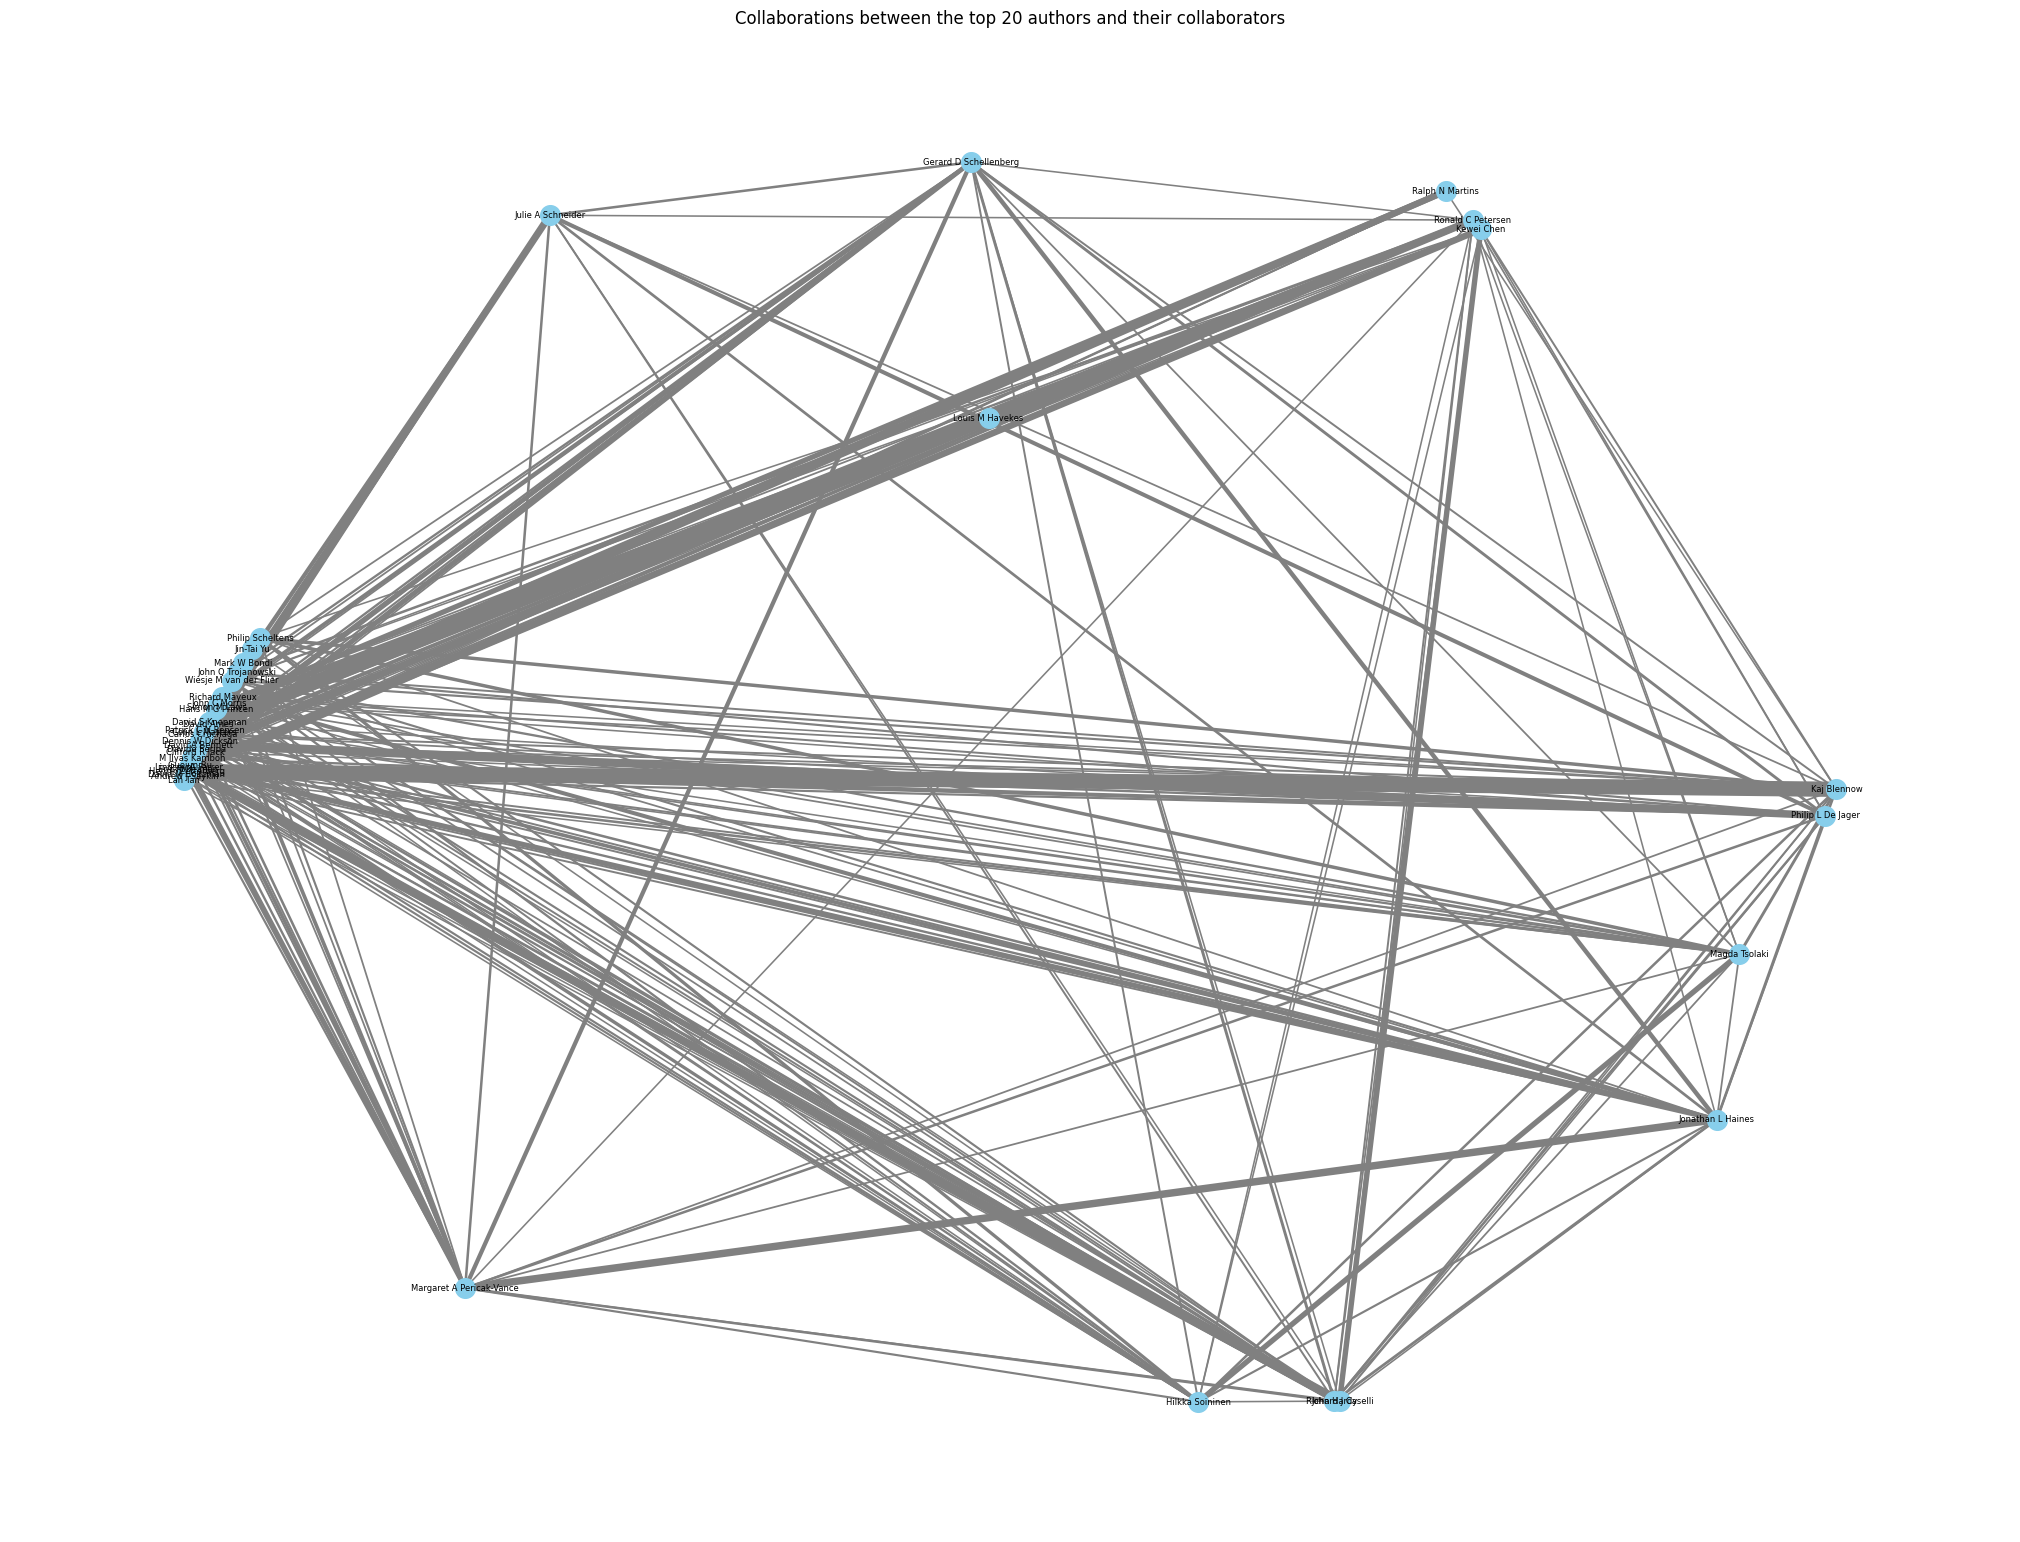

In [119]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 计算前20位作者
top_20_authors = network_analysis["AuthorFullname"].value_counts().nlargest(40).index

# 创建包含前20位作者的数据框
df_top20 = network_analysis[network_analysis["AuthorFullname"].isin(top_20_authors)]

# 创建图
G = nx.Graph()

# 遍历每篇文章
for pmid, group in df_top20.groupby('PMID'):
    # 提取作者列表
    authors = group['AuthorFullname'].tolist()
    
    # 创建节点和边
    for author1 in authors:
        # 将前20位作者设为一个节点
        if author1 not in G.nodes:
            G.add_node(author1)
        for author2 in authors:
            # 与前20位作者有过合作的其他作者也设为节点，并添加边
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)

# 获取边的权重信息
max_weight = max(G[u][v]['weight'] for u, v in G.edges())
edge_weights = [1 + 10 * G[u][v]['weight'] / max_weight for u, v in G.edges()]  # 调整权重范围，使其更宽

max_size = max(result_df_sorted['TotalCounts'])
node_sizes = [50 + 200 * count / max_size for count in result_df_sorted ['TotalCounts']]

# 根据作者分组创建 shell_layout
pos = nx.shell_layout(G, nlist=[list(group['AuthorFullname']) for pmid, group in df_top20.groupby('PMID')])

# 创建更大的图形
fig = plt.figure(figsize=(20, 15))

# 绘制网络图，根据边的权重设置线条粗细
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', width=edge_weights)

# 设置图形标题
plt.title('Collaborations between the top 20 authors and their collaborators')

# 显示图形
plt.show()


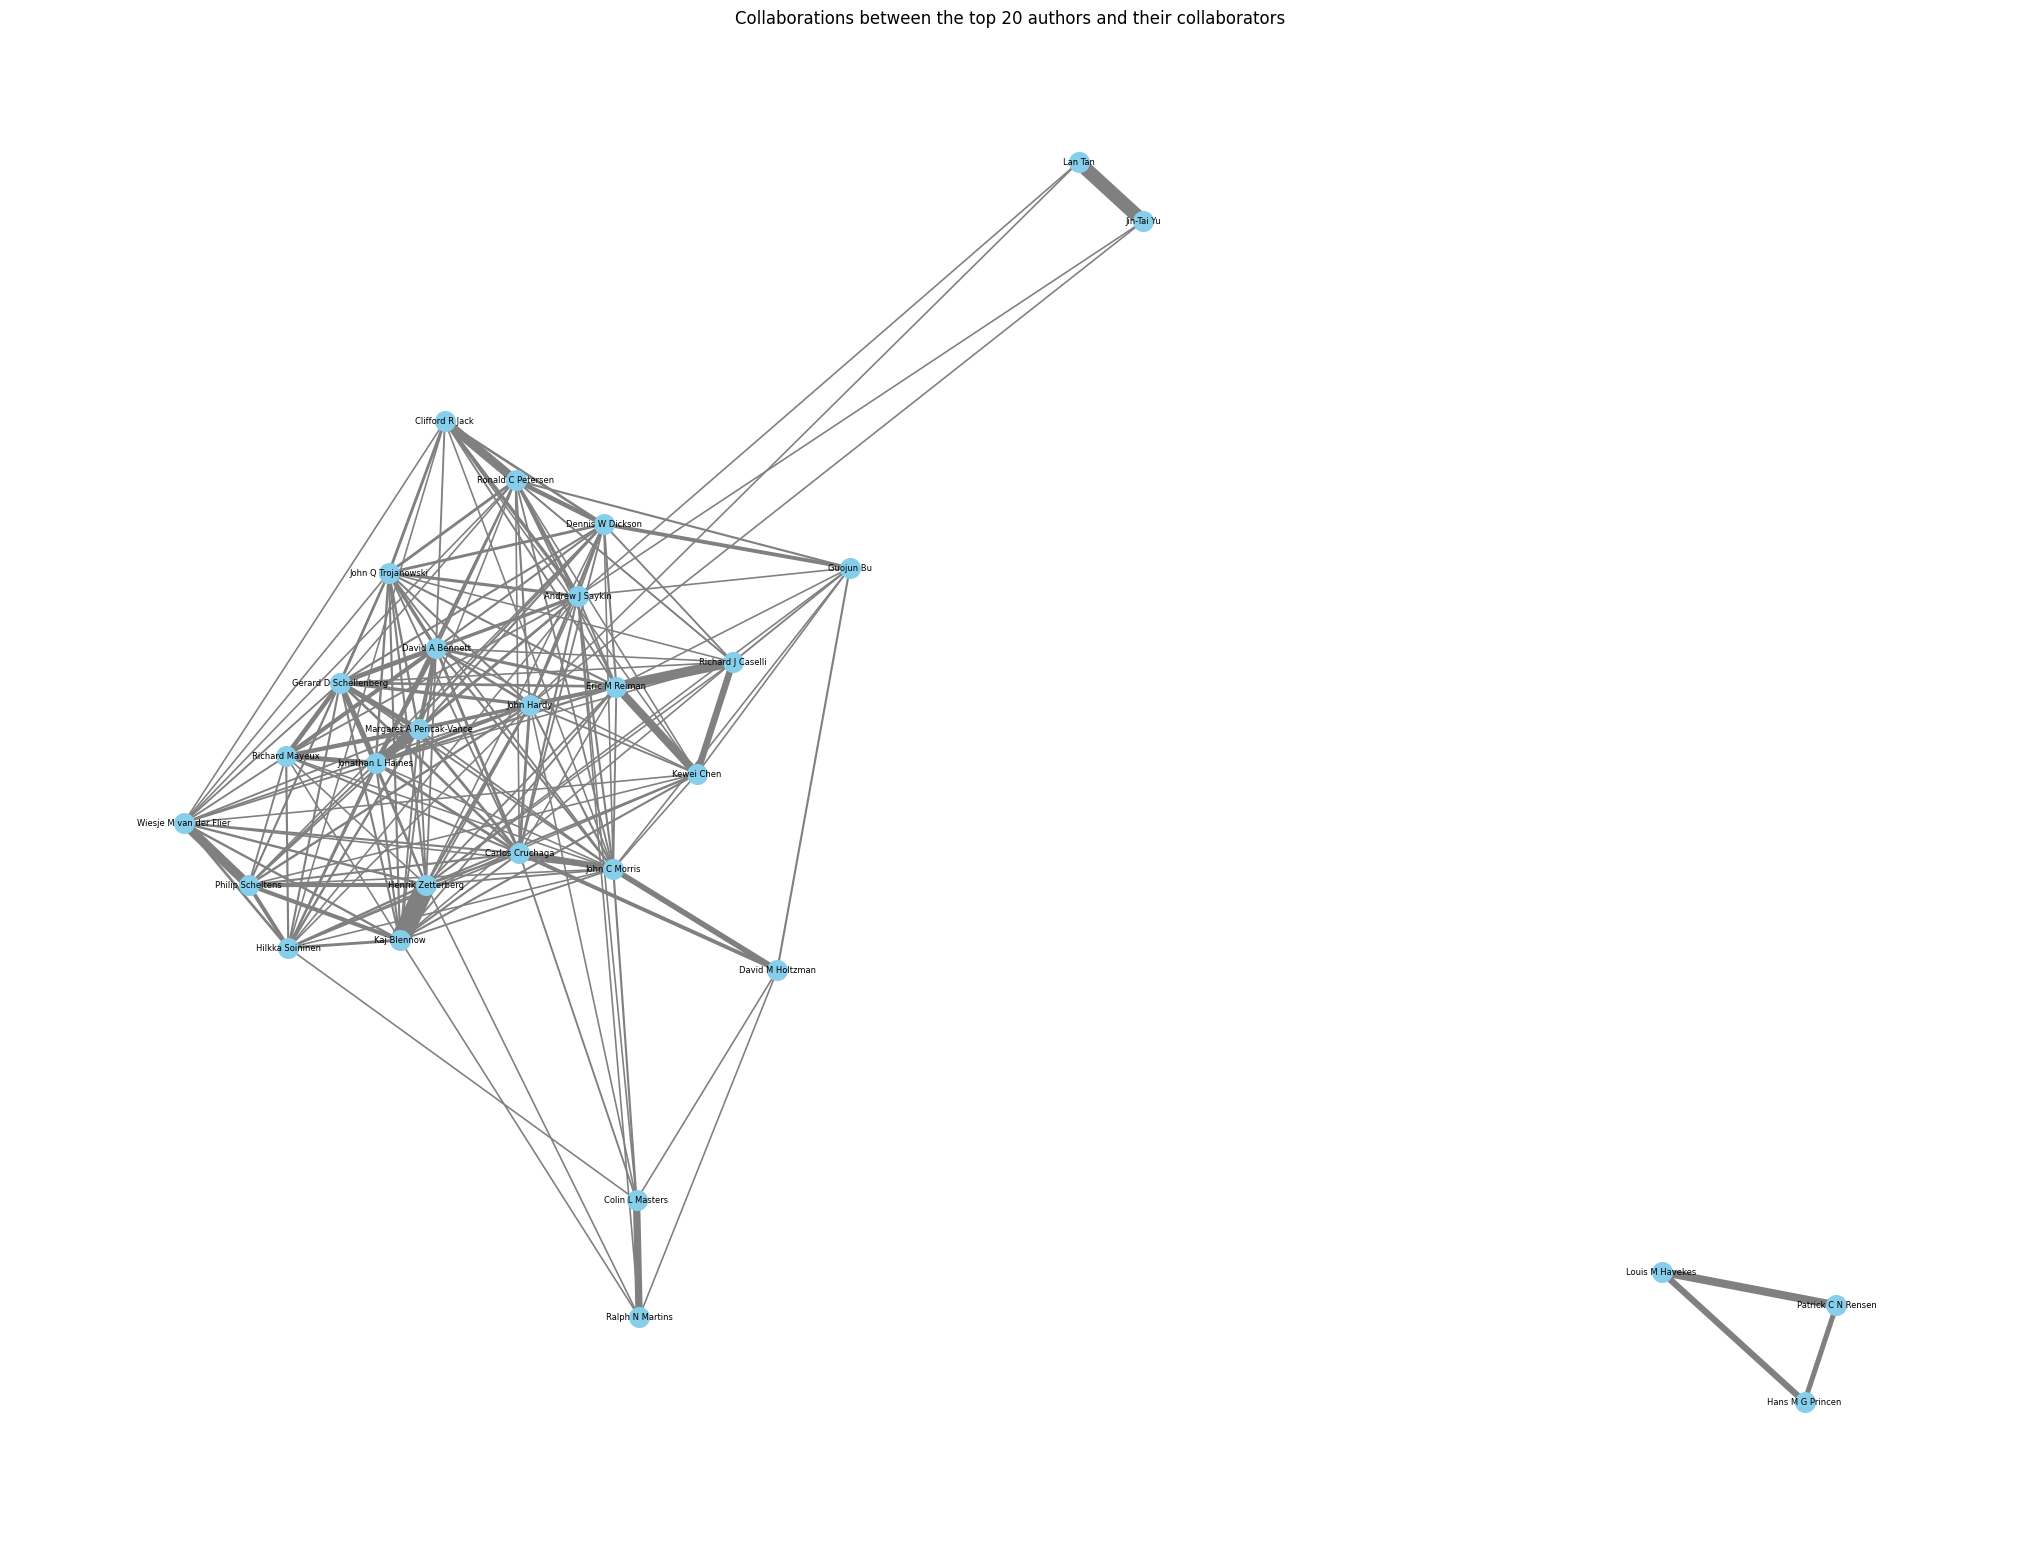

In [146]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 计算前20位作者
top_20_authors = network_analysis["AuthorFullname"].value_counts().nlargest(30).index

# 创建包含前20位作者的数据框
df_top20 = network_analysis[network_analysis["AuthorFullname"].isin(top_20_authors)]

# 创建图
G = nx.Graph()

# 遍历每篇文章
for pmid, group in df_top20.groupby('PMID'):
    # 提取作者列表
    authors = group['AuthorFullname'].tolist()
    
    # 创建节点和边
    for author1 in authors:
        # 将前20位作者设为一个节点
        if author1 not in G.nodes:
            G.add_node(author1)
        for author2 in authors:
            # 与前20位作者有过合作的其他作者也设为节点，并添加边
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)

# 获取边的权重信息
max_weight = max(G[u][v]['weight'] for u, v in G.edges())
edge_weights = [1 + 13 * G[u][v]['weight'] / max_weight for u, v in G.edges()]  # 调整权重范围，使其更宽

max_size = max(result_df_sorted['TotalCounts'])
node_sizes = [50 + 200 * count / max_size for count in result_df_sorted['TotalCounts']]

# 使用spring_layout布局算法，增加k的值，减小scale的值
pos = nx.spring_layout(G, seed=42, k=2, scale=3, iterations=100)

# 创建更大的图形
fig = plt.figure(figsize=(20, 15))

# 绘制网络图，根据边的权重设置线条粗细
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_color='skyblue', edge_color='grey', width=edge_weights,
        node_size=200, cmap=plt.cm.Blues, vmin=0, vmax=1)

# 设置图形标题
plt.title('Collaborations between the top 20 authors and their collaborators')

# 显示图形
plt.show()


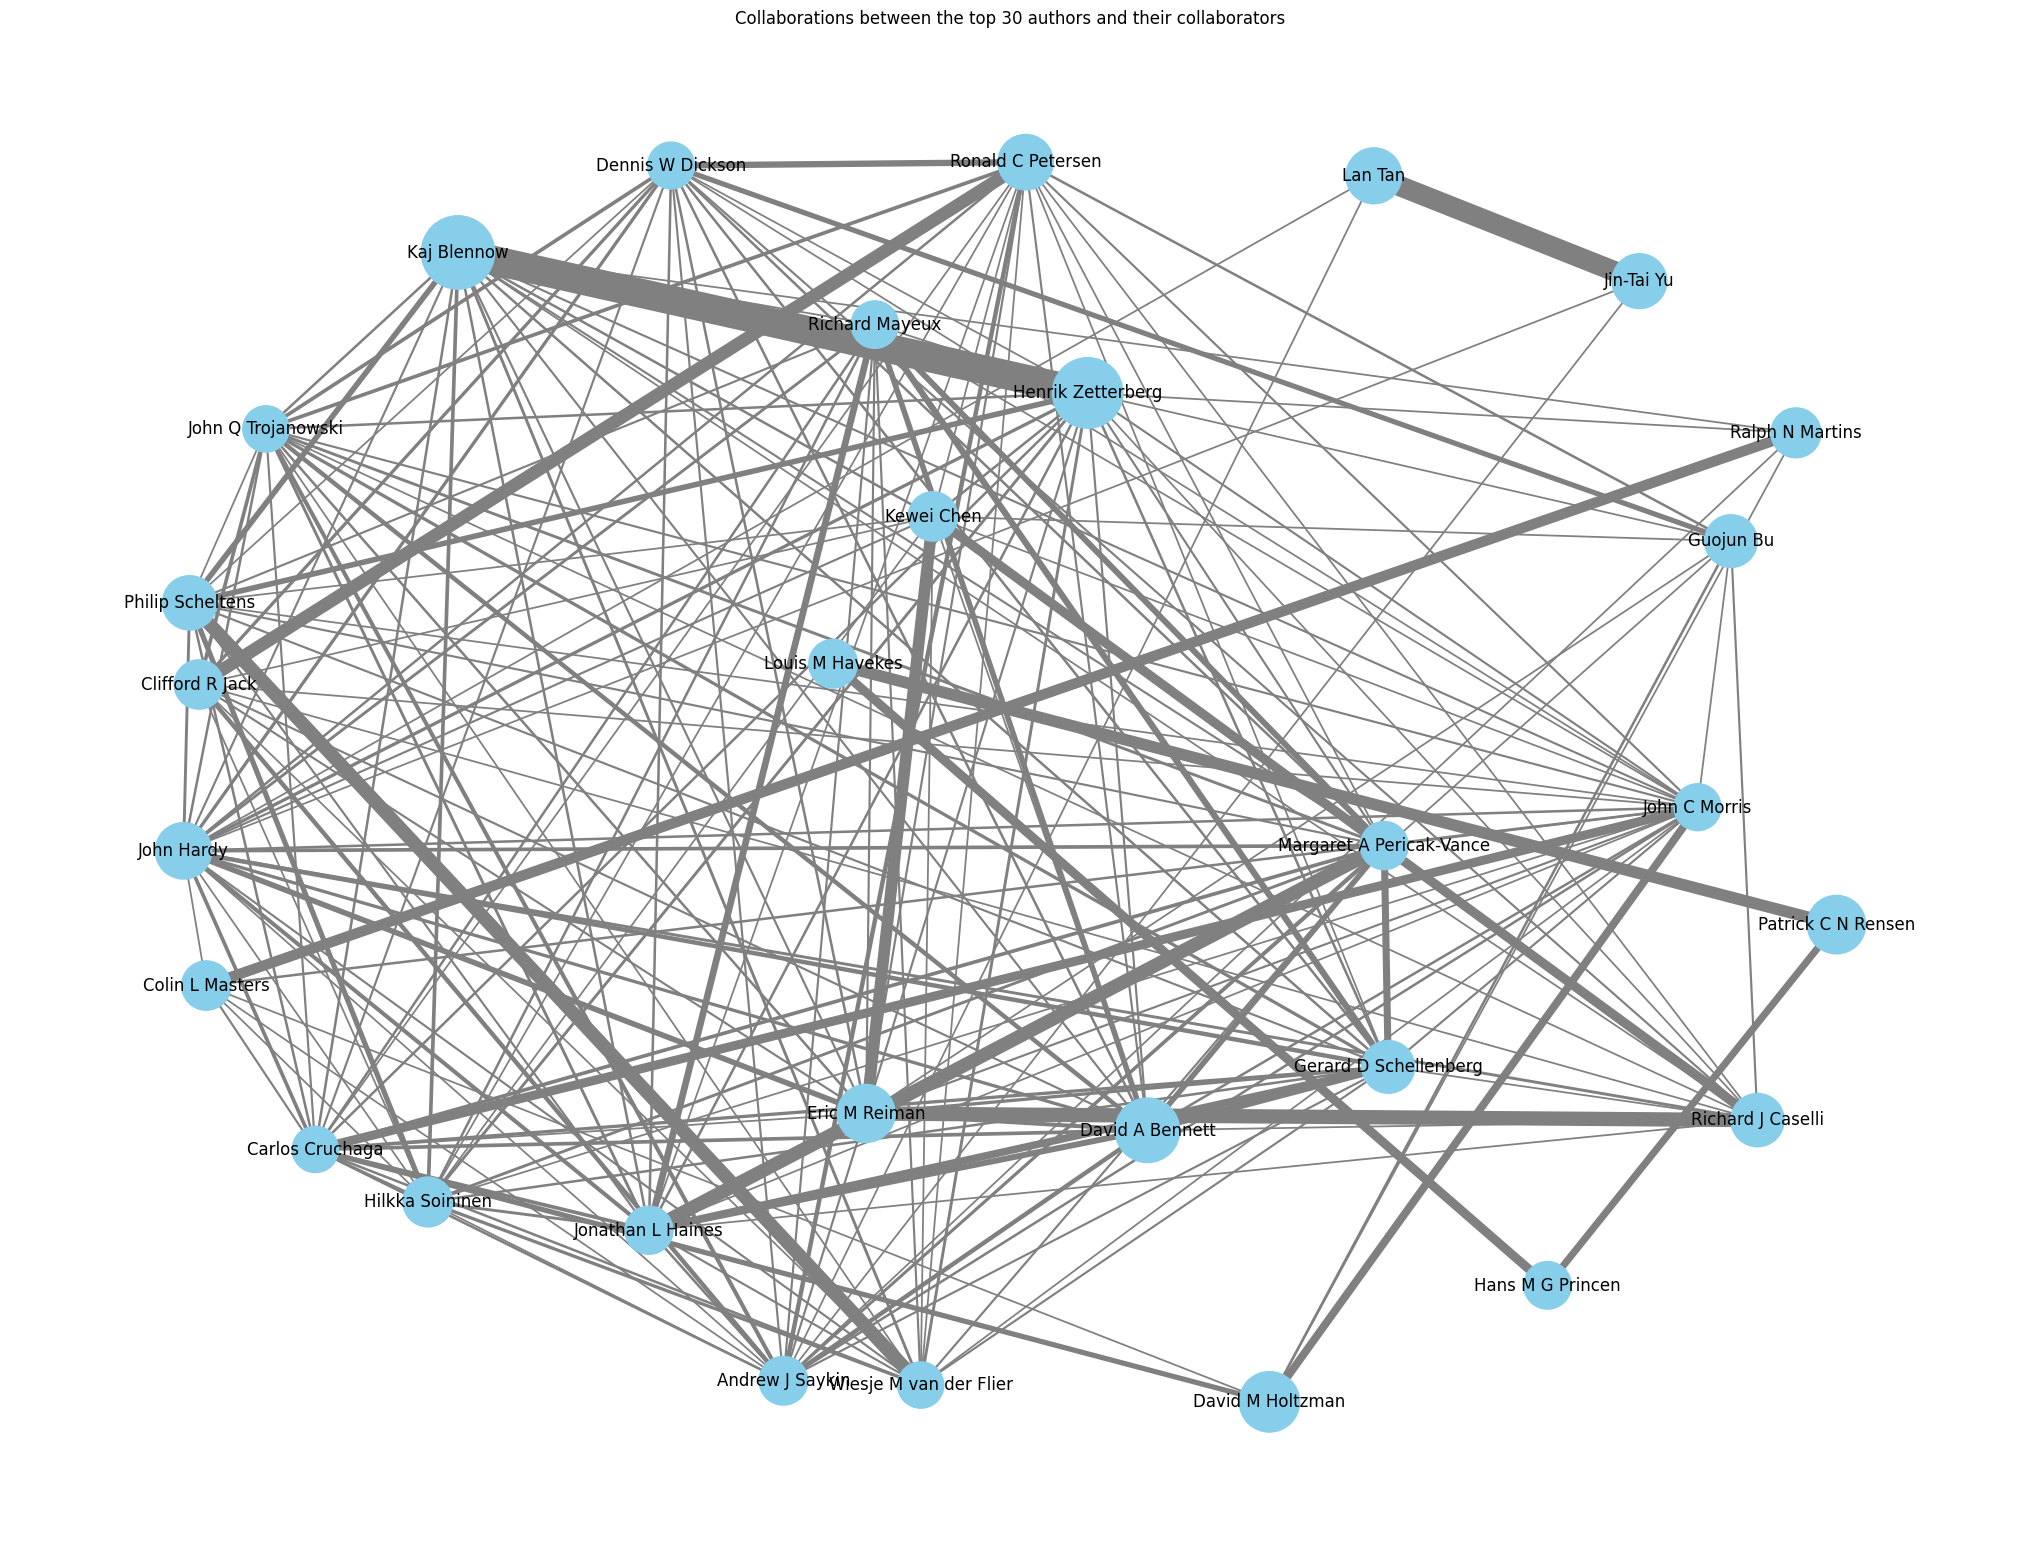

In [220]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 计算前20位作者
top_20_authors = network_analysis["AuthorFullname"].value_counts().nlargest(30).index

# 创建包含前20位作者的数据框
df_top20 = network_analysis[network_analysis["AuthorFullname"].isin(top_20_authors)]

# 创建图
G = nx.Graph()

# 遍历每篇文章
for pmid, group in df_top20.groupby('PMID'):
    # 提取作者列表
    authors = group['AuthorFullname'].tolist()
    
    # 创建节点和边
    for author1 in authors:
        # 将前20位作者设为一个节点，并将对应的文章数量关联到节点上
        if author1 not in G.nodes:
            G.add_node(author1, size=0)
        if 'size' not in G.nodes[author1]:
            G.nodes[author1]['size'] = 0
        G.nodes[author1]['size'] += 1  # 每篇文章增加节点的文章数量

        for author2 in authors:
            # 与前20位作者有过合作的其他作者也设为节点，并添加边
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)

# 获取边的权重信息
max_weight = max(G[u][v]['weight'] for u, v in G.edges())
edge_weights = [1 + 20 * G[u][v]['weight'] / max_weight for u, v in G.edges()]  # 调整权重范围，使其更宽

# 获取节点的文章数量信息
node_sizes = [1 + 30 * G.nodes[n]['size'] for n in G.nodes]

# 使用spring_layout布局算法，增加k的值，减小scale的值
pos = nx.spring_layout(G, seed=42, k=12, scale=1, iterations=100)

# 创建更大的图形
fig = plt.figure(figsize=(20, 15))

# 绘制网络图，根据边的权重设置线条粗细
nx.draw(G, pos, with_labels=True, font_size=12, font_color='black',
        node_color='skyblue', edge_color='grey', width=edge_weights,
        node_size=node_sizes, cmap=plt.cm.Blues, vmin=0, vmax=1)
# 设置图形标题
plt.title('Collaborations between the top 30 authors and their collaborators')

# 显示图形
plt.show()


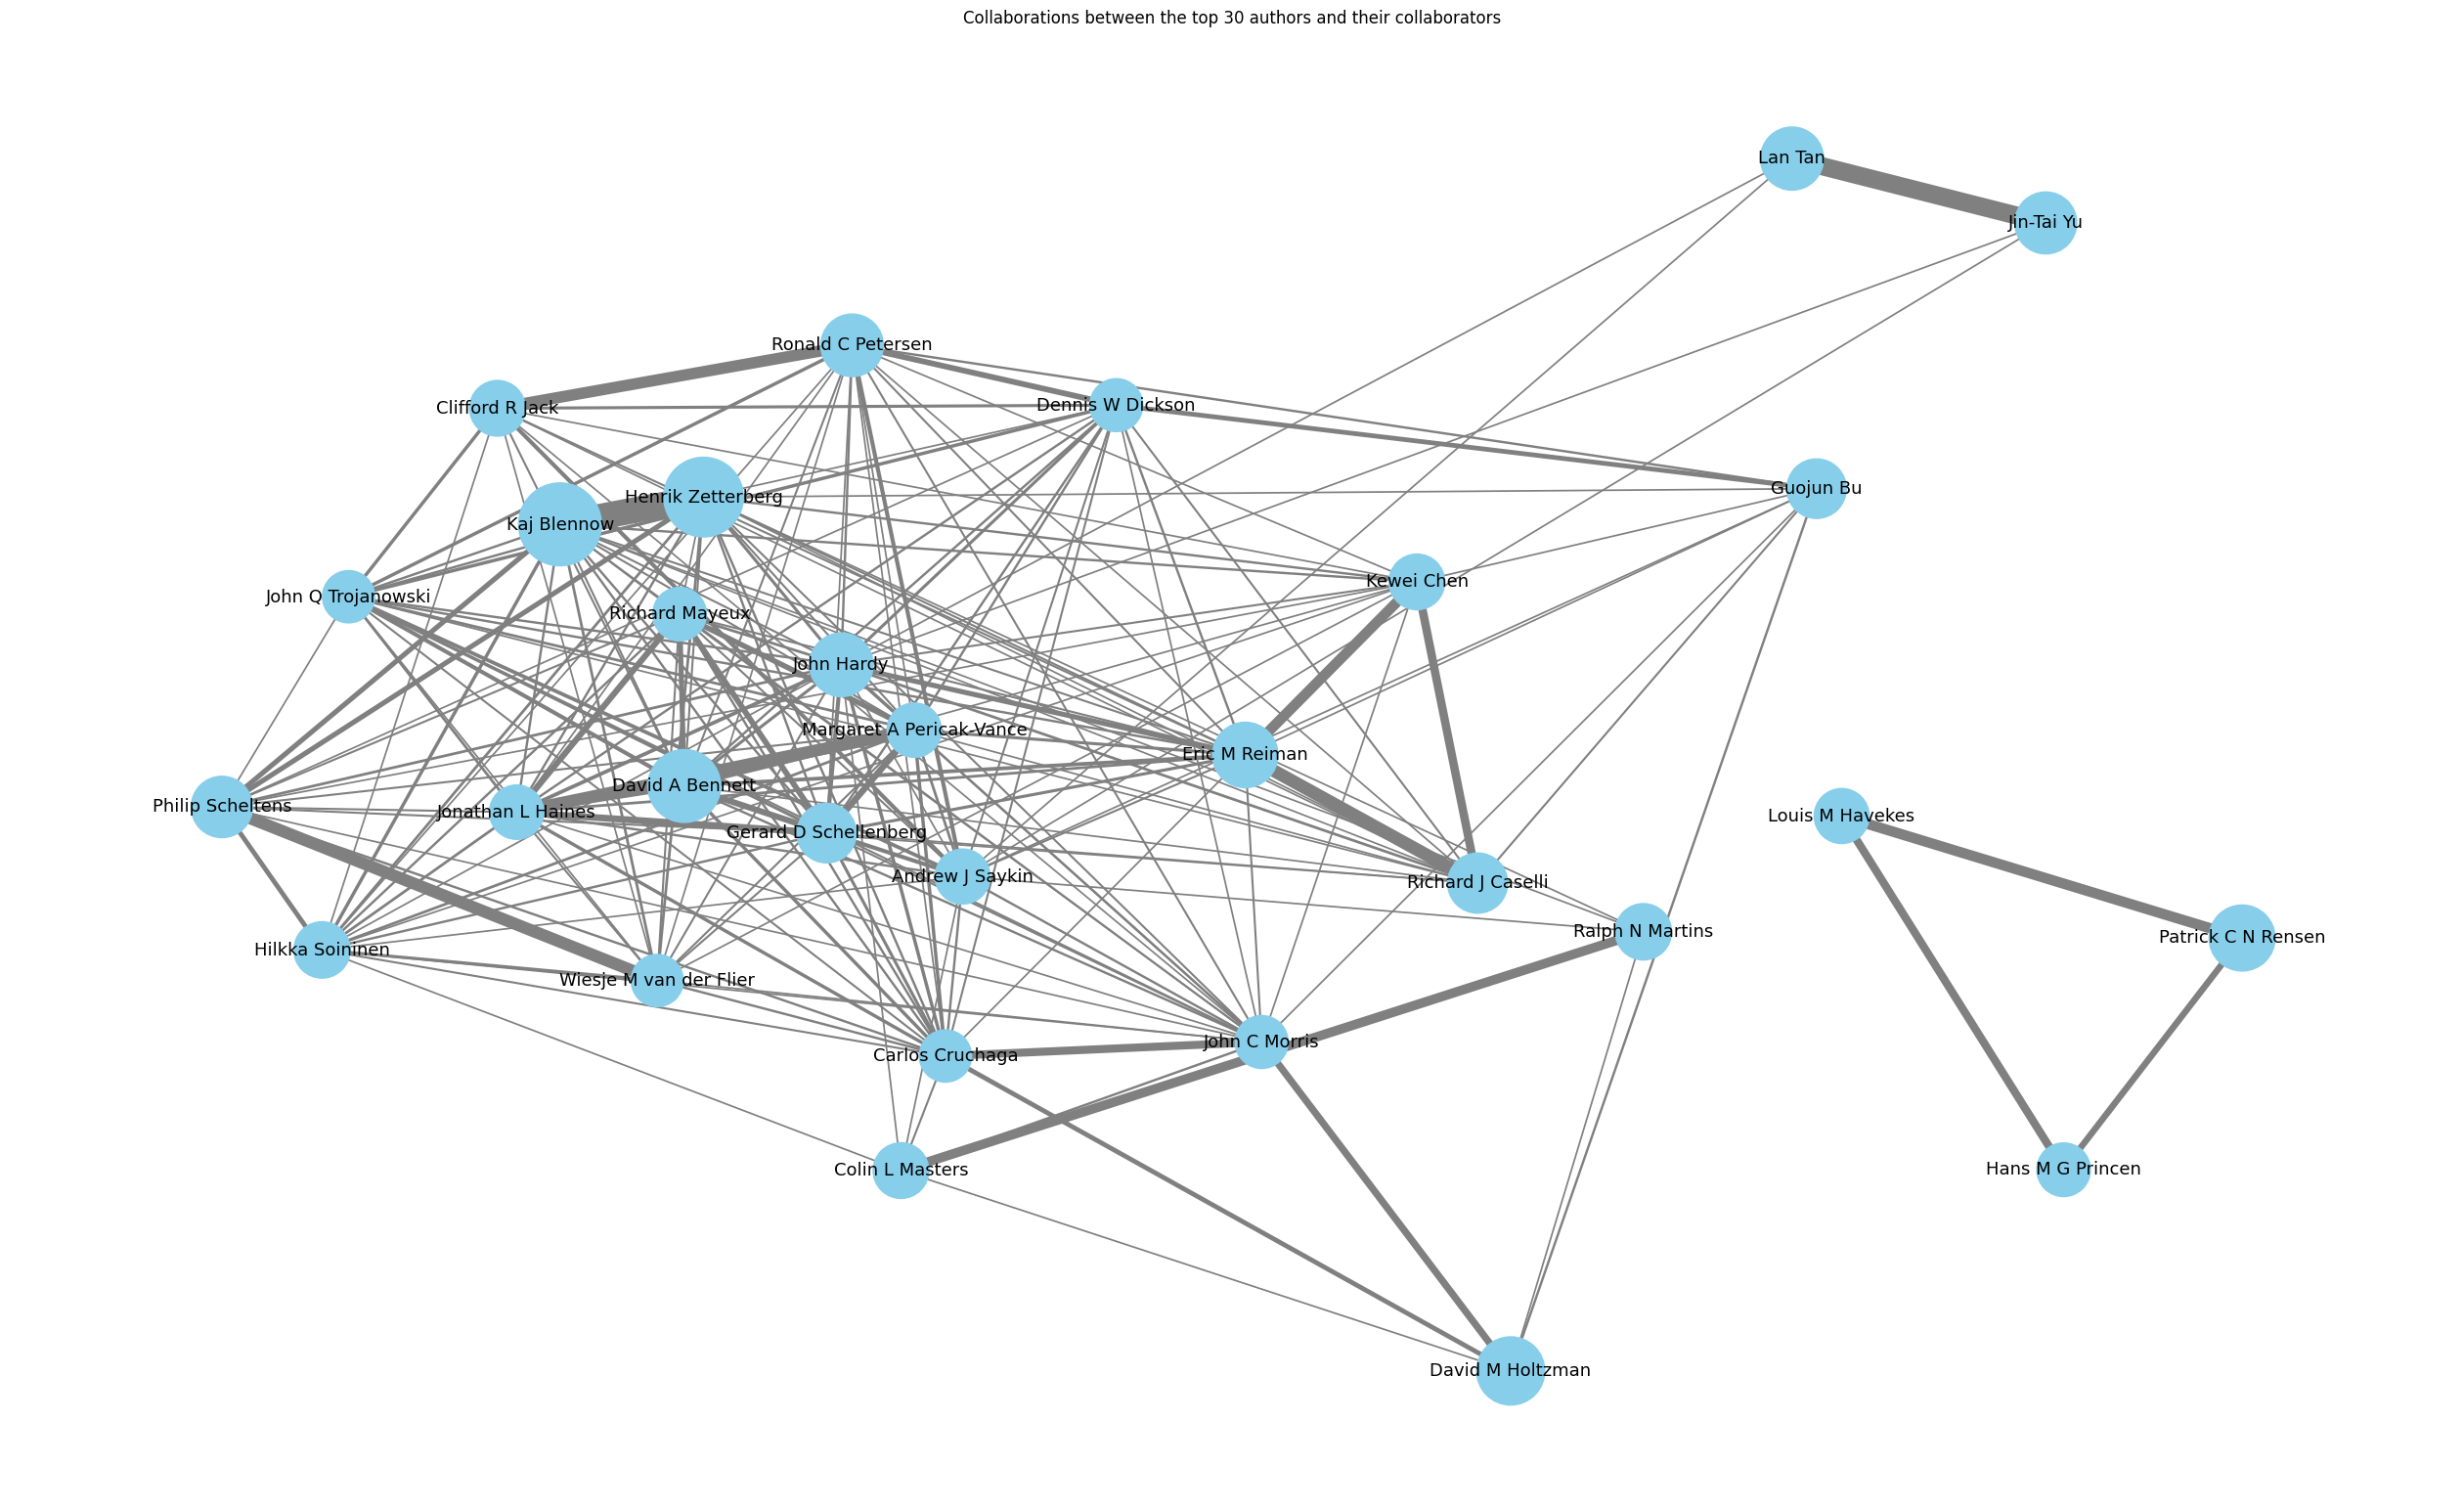

In [227]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
# 计算前20位作者
top_20_authors = network_analysis["AuthorFullname"].value_counts().nlargest(30).index
# 创建包含前20位作者的数据框
df_top20 = network_analysis[network_analysis["AuthorFullname"].isin(top_20_authors)]
# 创建图
G = nx.Graph()
# 遍历每篇文章
for pmid, group in df_top20.groupby('PMID'):
    # 提取作者列表
    authors = group['AuthorFullname'].tolist()
    # 创建节点和边
    for author1 in authors:
        # 将前20位作者设为一个节点，并将对应的文章数量关联到节点上
        if author1 not in G.nodes:
            G.add_node(author1, size=0)
        if 'size' not in G.nodes[author1]:
            G.nodes[author1]['size'] = 0
        G.nodes[author1]['size'] += 1  # 每篇文章增加节点的文章数量
        for author2 in authors:
            # 与前20位作者有过合作的其他作者也设为节点，并添加边
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)
# 使用Girvan-Newman算法检测社区结构
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
# 使用spring_layout布局算法，增加k的值，减小scale的值
pos = nx.spring_layout(G, seed=42, k=20, scale=3, iterations=100)
# 针对具有强合作关系的作者使用更小的k值
strongly_connected_authors = [author for community in next_level_communities for author in community]
strongly_connected_pos = nx.spring_layout(G.subgraph(strongly_connected_authors), seed=42, k=3, scale=1, iterations=50)
pos.update(strongly_connected_pos)
# 获取边的权重信息
max_weight = max(G[u][v]['weight'] for u, v in G.edges())
edge_weights = [1 + 18 * G[u][v]['weight'] / max_weight for u, v in G.edges()]  # 调整权重范围，使其更宽
# 获取节点的文章数量信息
node_sizes = [0.0001 + 40 * G.nodes[n]['size'] for n in G.nodes]
# 创建更大的图形
fig = plt.figure(figsize=(25, 15))
# 绘制网络图，根据边的权重设置线条粗细
nx.draw(G, pos, with_labels=True, font_size=13, font_color='black',
        node_color='skyblue', edge_color='grey', width=edge_weights,
        node_size=node_sizes, cmap=plt.cm.Blues, vmin=0, vmax=1)
# 设置图形标题
plt.title('Collaborations between the top 30 authors and their collaborators')
# 显示图形
plt.show()

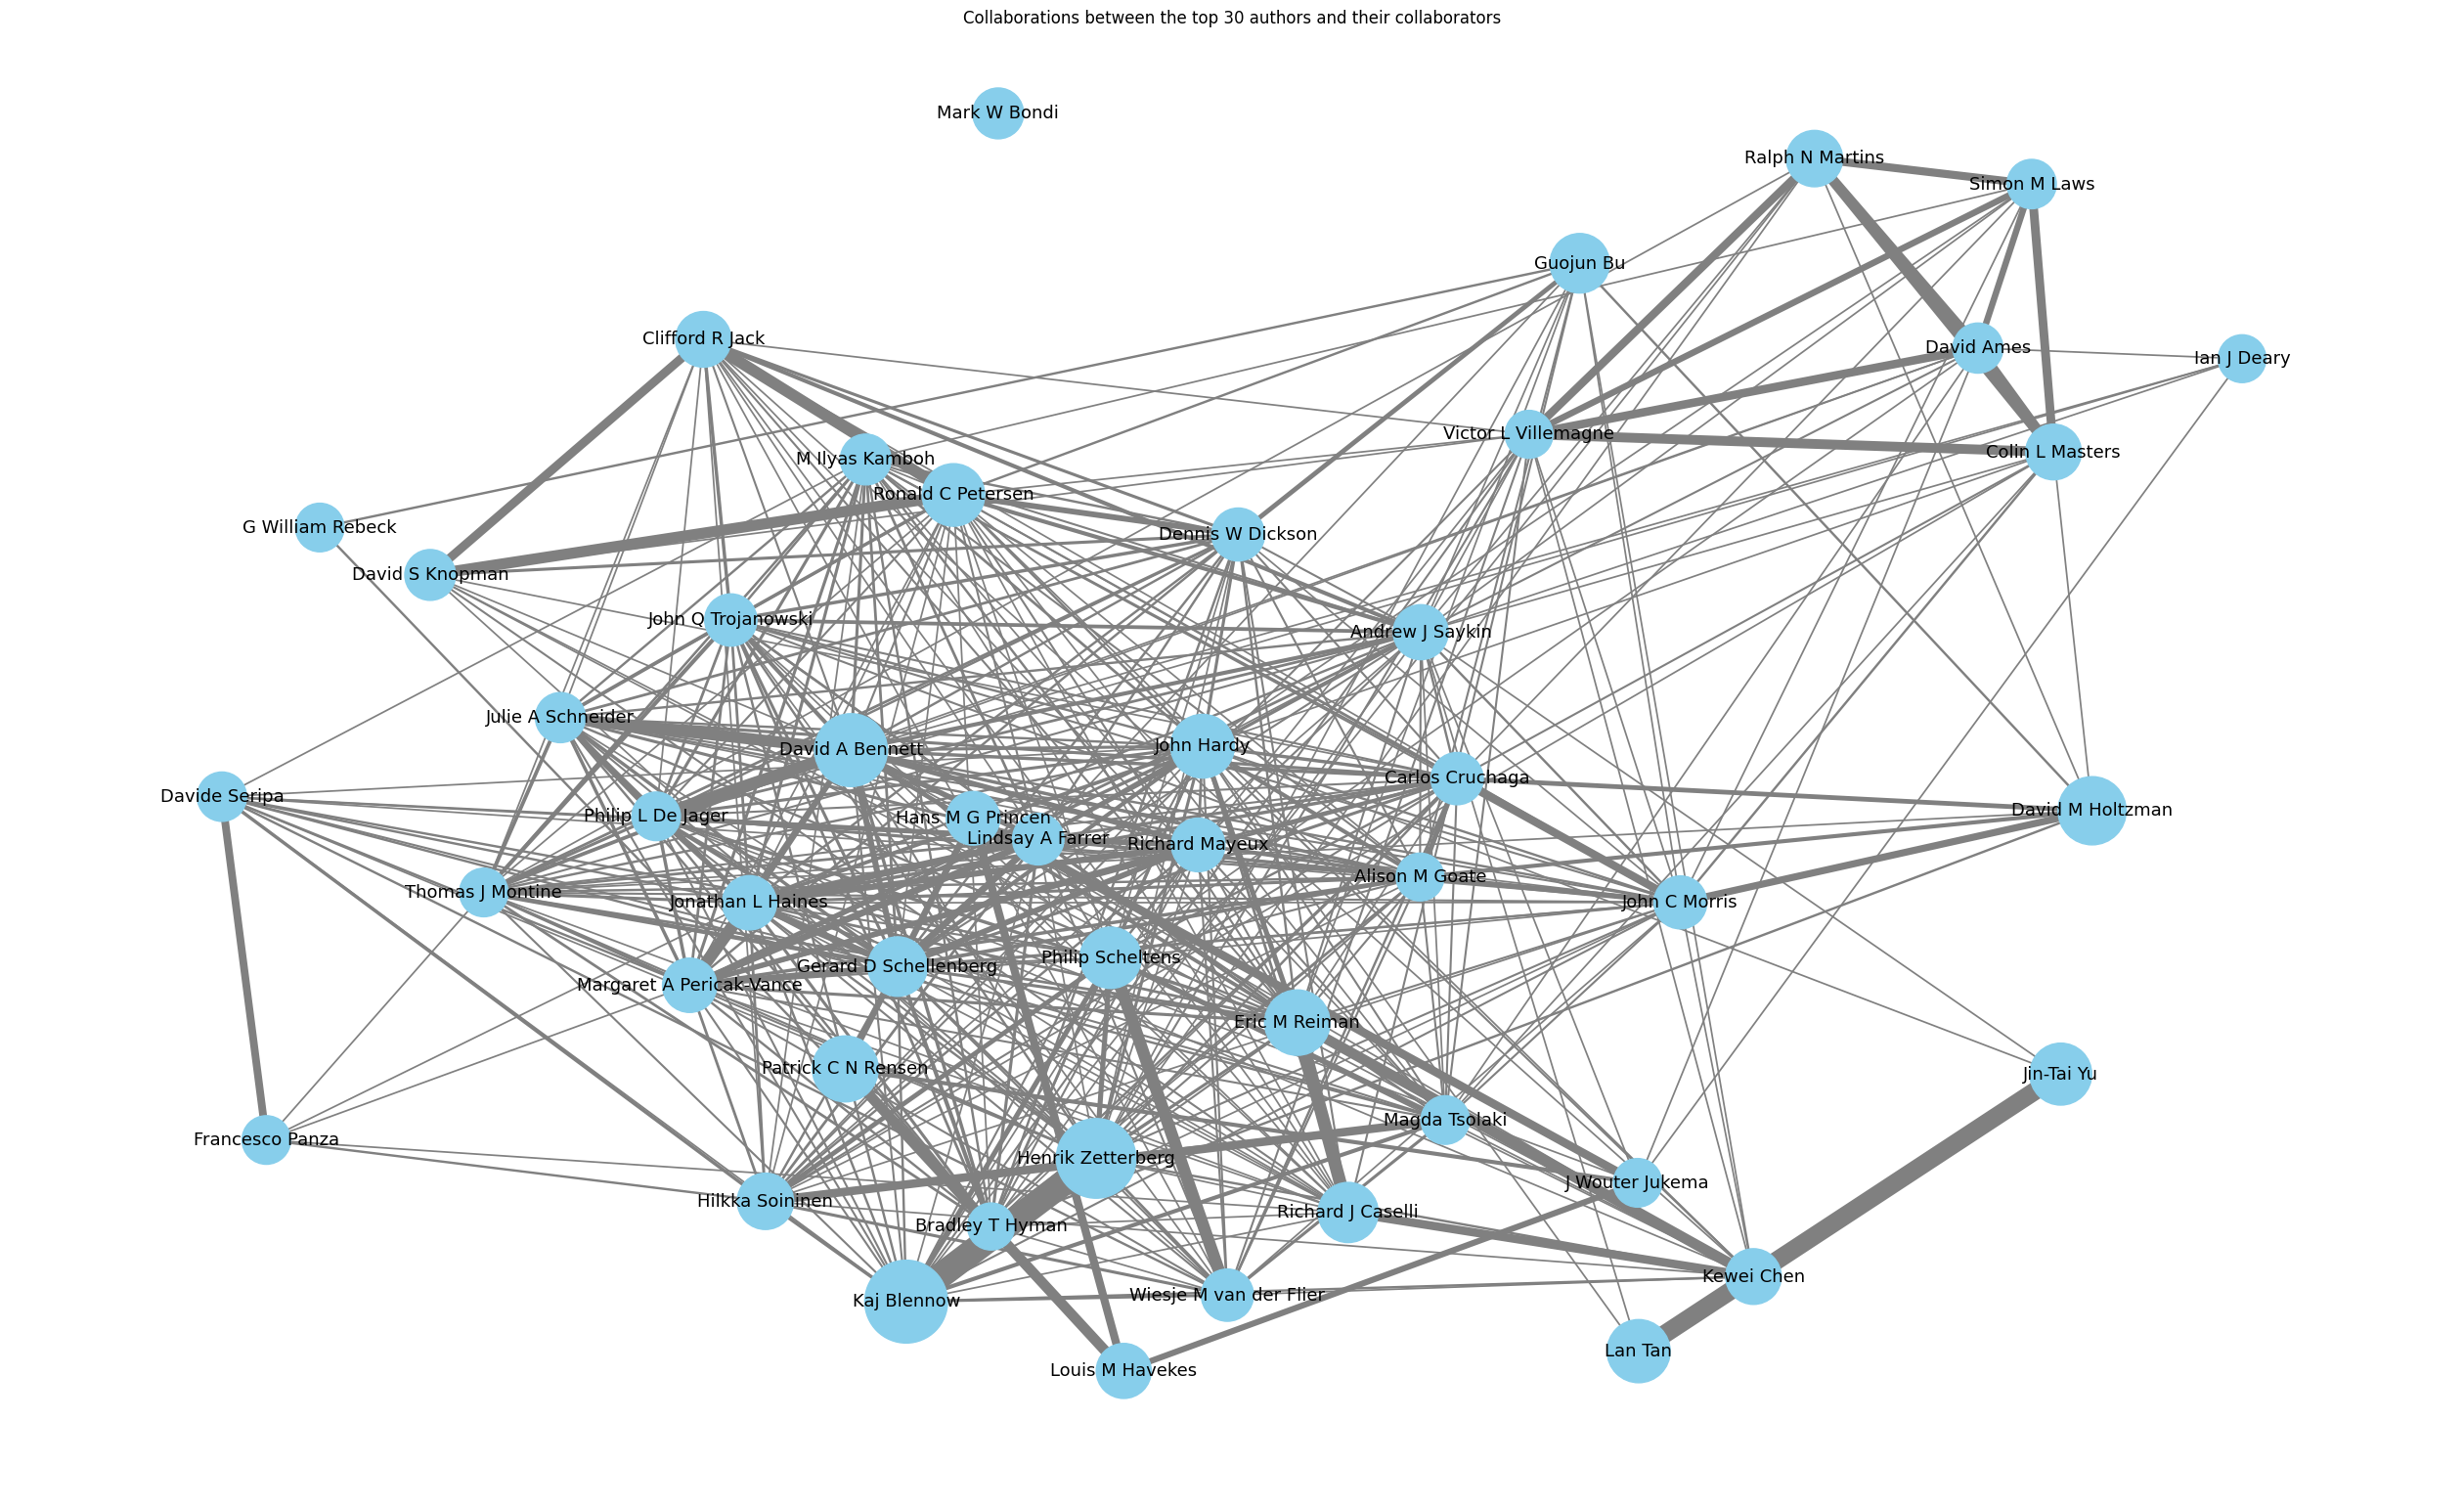

In [229]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
# 计算前20位作者
top_20_authors = network_analysis["AuthorFullname"].value_counts().nlargest(48).index
# 创建包含前20位作者的数据框
df_top20 = network_analysis[network_analysis["AuthorFullname"].isin(top_20_authors)]
# 创建图
G = nx.Graph()
# 遍历每篇文章
for pmid, group in df_top20.groupby('PMID'):
    # 提取作者列表
    authors = group['AuthorFullname'].tolist()
    # 创建节点和边
    for author1 in authors:
        # 将前20位作者设为一个节点，并将对应的文章数量关联到节点上
        if author1 not in G.nodes:
            G.add_node(author1, size=0)
        if 'size' not in G.nodes[author1]:
            G.nodes[author1]['size'] = 0
        G.nodes[author1]['size'] += 1  # 每篇文章增加节点的文章数量
        for author2 in authors:
            # 与前20位作者有过合作的其他作者也设为节点，并添加边
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)
# 使用Girvan-Newman算法检测社区结构
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
# 使用spring_layout布局算法，增加k的值，减小scale的值
pos = nx.spring_layout(G, seed=42, k=20, scale=3, iterations=100)
# 针对具有强合作关系的作者使用更小的k值
strongly_connected_authors = [author for community in next_level_communities for author in community]
strongly_connected_pos = nx.spring_layout(G.subgraph(strongly_connected_authors), seed=42, k=3, scale=1, iterations=50)
pos.update(strongly_connected_pos)
# 获取边的权重信息
max_weight = max(G[u][v]['weight'] for u, v in G.edges())
edge_weights = [1 + 18 * G[u][v]['weight'] / max_weight for u, v in G.edges()]  # 调整权重范围，使其更宽
# 获取节点的文章数量信息
node_sizes = [0.0001 + 40 * G.nodes[n]['size'] for n in G.nodes]
# 创建更大的图形
fig = plt.figure(figsize=(25, 15))
# 绘制网络图，根据边的权重设置线条粗细
nx.draw(G, pos, with_labels=True, font_size=13, font_color='black',
        node_color='skyblue', edge_color='grey', width=edge_weights,
        node_size=node_sizes, cmap=plt.cm.Blues, vmin=0, vmax=1)
# 设置图形标题
plt.title('Collaborations between the top 30 authors and their collaborators')
# 显示图形
plt.show()

In [193]:
#Calculating the top 50 authors according to occurrence in the dataset
top_authors_50 = network_analysis["AuthorFullname"].value_counts().nlargest(50).index
#Creating a dataframe with only the top 48 authors in it for the network analysis
df_top50 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors_50)]
#Changing the dataframe from 2 columns to 3 columns (author1, author2, PMID)
author_pmid_dict = {}
# Populate the author_pmid_dict
for index, row in df_top50.iterrows():
    author = row['AuthorFullname']
    PMID = row['PMID']
    if author not in author_pmid_dict:
        author_pmid_dict[author] = set()
    author_pmid_dict[author].add(PMID)
# Initialize an empty list to store the resulting data
result_data = []
# Iterate over the authors to find pairs and their shared PMIDs
for author1 in author_pmid_dict:
    for author2 in author_pmid_dict:
        if author1 < author2:  # To avoid duplicate pairs (author1, author2) and (author2, author1)
            shared_pmids = author_pmid_dict[author1].intersection(author_pmid_dict[author2])
            for PMID in shared_pmids:
                result_data.append([author1, author2, PMID])
# Create a new DataFrame from the result_data
result_df = pd.DataFrame(result_data, columns=['author1', 'author2', 'PMID'])
# Display or use the result_df as needed
print(result_df.head(30))

             author1                   author2      PMID
0   Lindsay A Farrer            Richard Mayeux  22869155
1   Lindsay A Farrer            Richard Mayeux  32844198
2   Lindsay A Farrer            Richard Mayeux  35142023
3   Lindsay A Farrer            Richard Mayeux  20697030
4   Lindsay A Farrer            Richard Mayeux  31180460
5   Lindsay A Farrer            Richard Mayeux  30413934
6   Lindsay A Farrer            Richard Mayeux  23360175
7   Lindsay A Farrer            Richard Mayeux  23565137
8   Lindsay A Farrer            Richard Mayeux  28323831
9   Lindsay A Farrer            Richard Mayeux  30108311
10  Lindsay A Farrer            Richard Mayeux  35379992
11  Lindsay A Farrer            Richard Mayeux  34099642
12  Lindsay A Farrer            Richard Mayeux  26092349
13  Lindsay A Farrer  Margaret A Pericak-Vance  25199842
14  Lindsay A Farrer  Margaret A Pericak-Vance  22869155
15  Lindsay A Farrer  Margaret A Pericak-Vance  32844198
16  Lindsay A Farrer  Margaret 

In [201]:
network_analysis.head(30)

PMID        AuthorFullname
0   10545039          K E Morrison
1   10545039              G Steers
2   10545039            V Dubowitz
3   10558867            M L Brandi
4   10558867           L Becherini
5   10558867             L Gennari
6   10558867              M Racchi
7   10558867          A Bianchetti
8   10558867             B Nacmias
9   10558867               S Sorbi
10  10558867             P Mecocci
11  10558867               U Senin
12  10558867              S Govoni
13  10560469          D C Steffens
14  10560469      J C Morgenlander
15  10563634             C Geroldi
16  10563634         M Pihlajamäki
17  10563634            M P Laakso
18  10563634             C DeCarli
19  10563634         A Beltramello
20  10563634          A Bianchetti
21  10563634            H Soininen
22  10563634           M Trabucchi
23  10563634           G B Frisoni
24  10570509             V Alvarez
25  10570509             R Alvarez
26  10570509                J Peña
27  10570509             C H Lahoz
28  10570509            C Martínez
29  10570509  L Menéndez-Guisasola

In [202]:
result_df_sorted

FullName  FirstAuthorCounts  LastAuthorCounts  TotalCounts
1001     David MHoltzman                2.0              32.0         34.0
6835              LanTan                0.0              33.0         33.0
3760      RamónCacabelos               18.0              14.0         32.0
1563            GuojunBu                1.0              23.0         24.0
1262        Eric MReiman                8.0              16.0         24.0
...                  ...                ...               ...          ...
3161         Mi-RyungHan                1.0               0.0          1.0
3160  Meysam JafariAqdam                1.0               0.0          1.0
3158     Meryl SLillenes                1.0               0.0          1.0
3157      Meryl AButters                1.0               0.0          1.0
8448            ÉvaCsősz                0.0               1.0          1.0

[8449 rows x 4 columns]